# Setup

In [ ]:
!pip install torch torchvision -q
!pip install pycocotools lxml tqdm -q
!pip install ultralytics


  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.6 MB/s eta 0:00:00
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)


In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
import sys, os
sys.path.insert(0, '/home/sagemaker-user')

In [ ]:
import sys
# install into the active interpreter
!{sys.executable} -m pip install --no-cache-dir opencv-python-headless
# confirm it’s there
!{sys.executable} -m pip show opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 243.8 MB/s eta 0:00:00a 0:00:01
Name: opencv-python-headless
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /opt/conda/lib/python3.12/site-packages
Requires: numpy
Required-by: 


In [ ]:
import ultralytics
from ultralytics import YOLO


In [ ]:
!nvidia-smi

Tue May 20 05:25:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.163.01             Driver Version: 550.163.01     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       On  |   00000000:00:1E.0 Off |                    0 |
| N/A   36C    P0             25W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# unzip data

In [ ]:
!unzip "sheep_video_02-20250520T040909Z-1-001.zip"  -d extracted_dataset_custom_3

Archive:  sheep_video_02-20250520T040909Z-1-001.zip
  inflating: extracted_dataset_custom_3/sheep_video_02/train/frame_00130_rot270.jpg  
  inflating: extracted_dataset_custom_3/sheep_video_02/train/frame_00130_rot180.xml  
  inflating: extracted_dataset_custom_3/sheep_video_02/train/frame_00116_rot90.jpg  
  inflating: extracted_dataset_custom_3/sheep_video_02/val/frame_00111_rot270.jpg  
  inflating: extracted_dataset_custom_3/sheep_video_02/val/frame_00106_rot90.xml  
  inflating: extracted_dataset_custom_3/sheep_video_02/val/frame_00116_rot0.jpg  
  inflating: extracted_dataset_custom_3/sheep_video_02/train/frame_00091_rot180.xml  
  inflating: extracted_dataset_custom_3/sheep_video_02/train/frame_00101_rot0.jpg  
  inflating: extracted_dataset_custom_3/sheep_video_02/val/frame_00106_rot90.jpg  
  inflating: extracted_dataset_custom_3/sheep_video_02/train/frame_00111_rot0.xml  
  inflating: extracted_dataset_custom_3/sheep_video_02/train/frame_00130_rot0.jpg  
  inflating: extracte

In [ ]:
!unzip "Aerial Sheep.v1-v1.yolov11.zip"  -d extracted_dataset_yolov11

Archive:  Aerial Sheep.v1-v1.yolov11.zip
  inflating: extracted_dataset_yolov11/README.dataset.txt  
  inflating: extracted_dataset_yolov11/README.roboflow.txt  
  inflating: extracted_dataset_yolov11/data.yaml  
   creating: extracted_dataset_yolov11/test/
   creating: extracted_dataset_yolov11/test/images/
 extracting: extracted_dataset_yolov11/test/images/DJI_0004_0262_jpg.rf.14f93587a02be481b46b466ea33580a9.jpg  
 extracting: extracted_dataset_yolov11/test/images/DJI_0004_0285_jpg.rf.3437cf4895f48307e807216955ab9d02.jpg  
 extracting: extracted_dataset_yolov11/test/images/DJI_0004_0290_jpg.rf.414563acc6568f6a8e9cccbae5ea39e6.jpg  
 extracting: extracted_dataset_yolov11/test/images/DJI_0005_0002_jpg.rf.0a5178c93661aded7723bf47e2e423b4.jpg  
 extracting: extracted_dataset_yolov11/test/images/DJI_0005_0014_jpg.rf.c677eebcf83e27a7404c736c21bef075.jpg  
 extracting: extracted_dataset_yolov11/test/images/DJI_0005_0017_jpg.rf.097ae294f4779de4c5cfab65c4e04645.jpg  
 extracting: extracted_d

In [ ]:
!unzip "custom_dataset_01.zip"  -d extracted_dataset_custom_1

Archive:  custom_dataset_01.zip
   creating: extracted_dataset_yolov11_2/original_video_01/
  inflating: extracted_dataset_yolov11_2/__MACOSX/._original_video_01  
  inflating: extracted_dataset_yolov11_2/original_video_01/frame_00048.jpg  
  inflating: extracted_dataset_yolov11_2/original_video_01/frame_00048.xml  
  inflating: extracted_dataset_yolov11_2/__MACOSX/original_video_01/._frame_00048.xml  
  inflating: extracted_dataset_yolov11_2/original_video_01/frame_00049.xml  
  inflating: extracted_dataset_yolov11_2/__MACOSX/original_video_01/._frame_00049.xml  
  inflating: extracted_dataset_yolov11_2/original_video_01/frame_00049.jpg  
  inflating: extracted_dataset_yolov11_2/original_video_01/frame_00012.jpg  
  inflating: extracted_dataset_yolov11_2/original_video_01/frame_00006.jpg  
  inflating: extracted_dataset_yolov11_2/original_video_01/frame_00012.xml  
  inflating: extracted_dataset_yolov11_2/__MACOSX/original_video_01/._frame_00012.xml  
  inflating: extracted_dataset_yo

In [ ]:
!unzip "custom_dataset_02.zip"  -d extracted_dataset_custom_2

Archive:  custom_dataset_02.zip
   creating: extracted_dataset_custom_2/combined_5678/
  inflating: extracted_dataset_custom_2/combined_5678/video_08_frame_00003.xml  
  inflating: extracted_dataset_custom_2/__MACOSX/combined_5678/._video_08_frame_00003.xml  
  inflating: extracted_dataset_custom_2/combined_5678/video_08_frame_00003.jpg  
  inflating: extracted_dataset_custom_2/combined_5678/video_07_frame_00001.xml  
  inflating: extracted_dataset_custom_2/__MACOSX/combined_5678/._video_07_frame_00001.xml  
  inflating: extracted_dataset_custom_2/combined_5678/video_07_frame_00001.jpg  
  inflating: extracted_dataset_custom_2/combined_5678/video_07_frame_00000.jpg  
  inflating: extracted_dataset_custom_2/combined_5678/video_07_frame_00000.xml  
  inflating: extracted_dataset_custom_2/__MACOSX/combined_5678/._video_07_frame_00000.xml  
  inflating: extracted_dataset_custom_2/combined_5678/video_08_frame_00002.jpg  
  inflating: extracted_dataset_custom_2/combined_5678/video_08_frame_0

In [ ]:
!unzip "videos.zip"  -d videos

Archive:  videos.zip
  inflating: videos/video_01.mp4     
  inflating: videos/__MACOSX/._video_01.mp4  
  inflating: videos/video_02.mp4     
  inflating: videos/__MACOSX/._video_02.mp4  
  inflating: videos/video_04.mp4     
  inflating: videos/__MACOSX/._video_04.mp4  
  inflating: videos/video_5.mp4      
  inflating: videos/__MACOSX/._video_5.mp4  
  inflating: videos/video_06.mp4     
  inflating: videos/__MACOSX/._video_06.mp4  
  inflating: videos/video_07.mp4     
  inflating: videos/__MACOSX/._video_07.mp4  
  inflating: videos/video_08.mp4     
  inflating: videos/__MACOSX/._video_08.mp4  


# convert pascal voc to yolo format

In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

# Source folders
voc_anno_dir = 'extracted_dataset_custom_3/sheep_video_02/test'  # contains .xml files
image_dir = 'extracted_dataset_custom_3/sheep_video_02/test'     # contains .jpg images

# Output folders
output_img_dir = 'combined_custom_dataset_yolo/test/images'
output_label_dir = 'combined_custom_dataset_yolo/test/labels'
# train_img_dir = 'extracted_dataset_custom_3_yolo/train/images'
# valid_img_dir = 'extracted_dataset_custom_3_yolo/valid/images'

os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)
# os.makedirs(train_img_dir, exist_ok=True)
# os.makedirs(valid_img_dir, exist_ok=True)

# Class mapping (update if needed)
class_map = {'sheep': 0}

# Loop through all annotation XML files
for xml_file in os.listdir(voc_anno_dir):
    if not xml_file.endswith('.xml'):
        continue

    xml_path = os.path.join(voc_anno_dir, xml_file)
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
    except Exception as e:
        print(f"Failed to parse {xml_path}: {e}")
        continue
    # print(xml_path)
    # print(xml_file)

    filename = os.path.splitext(xml_file)[0] + ".jpg"

    # print(filename)

    # Get image filename from XML
    # filename = os.path.basename(root.find('filename').text)
    img_path = os.path.join(image_dir, filename)

    # print(filename)
    # print(img_path)

    # Check if image exists
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        continue

    try:
        image = Image.open(img_path)
        w, h = image.size
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        continue

    # Save image to YOLO image folder
    image.save(os.path.join(output_img_dir, filename))

    # Write YOLO label file
    txt_filename = os.path.splitext(filename)[0] + '.txt'
    txt_path = os.path.join(output_label_dir, txt_filename)

    with open(txt_path, 'w') as f:
        for obj in root.findall('object'):
            cls = obj.find('name').text
            if cls not in class_map:
                continue
            cls_id = class_map[cls]
            bbox = obj.find('bndbox')
            xmin = float(bbox.find('xmin').text)
            ymin = float(bbox.find('ymin').text)
            xmax = float(bbox.find('xmax').text)
            ymax = float(bbox.find('ymax').text)

            # Convert to YOLO format
            x_center = (xmin + xmax) / 2 / w
            y_center = (ymin + ymax) / 2 / h
            box_w = (xmax - xmin) / w
            box_h = (ymax - ymin) / h

            f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {box_w:.6f} {box_h:.6f}\n")


In [ ]:
# import os

# os.makedirs('extracted_dataset_custom_3_yolo', exist_ok=True)
data_yaml = """
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['sheep']
"""
with open('extracted_dataset_custom_3_yolo/data.yaml', 'w') as f:
    f.write(data_yaml)



# Train the model

In [ ]:
# ─── Cell 2: Imports & Device Setup ─────────────────────────────────────────────
from ultralytics import YOLO

# Select GPU (0 = first GPU)
DEVICE = 0
# ─── Cell 3: Write a data config for your sheep dataset(if any)─────────────────────────


model = YOLO("yolo11x.pt") # <- automatically fetches and loads from Ultralytics hub


In [ ]:
# ─── Cell 5: Train on your sheep dataset ────────────────────────────────────────
model.train(
    data='extracted_dataset_yolov11/data.yaml',   # path to the YAML config
    model='yolov11x.pt',        # start from official YOLO11x weights
    epochs=200,                 # you can bump up to 250–300 if you like
    imgsz=640,                 # high-res for small/distant sheep
    batch=8,                   # tune to fit your GPU memory
    device=DEVICE,              # GPU index
    patience=40,                # early-stop if no mAP gain
    augment=True,               # mosaic, mixup, etc.
    lr0=0.01,                   # initial LR
    lrf=0.1,                    # final LR = lr0 * lrf
    save=True                   # save the best checkpoint
)


Ultralytics 8.3.139 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=extracted_dataset_yolov11/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov11x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=40, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

train: Scanning /home/sagemaker-user/extracted_dataset_yolov11/train/labels.cache... 3609 images, 7 backgrounds, 0 corrupt: 100%|██████████| 3609/3609 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1479.1±1032.5 MB/s, size: 104.0 KB)


val: Scanning /home/sagemaker-user/extracted_dataset_yolov11/valid/labels.cache... 350 images, 1 backgrounds, 0 corrupt: 100%|██████████| 350/350 [00:00<?, ?it/s]


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)


2025/05/19 06:08:24 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


MLflow: logging run_id(dd462898ffcf44fda27827e86de4bcff) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train12
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      8.81G       1.56      0.798       1.12         36        640: 100%|██████████| 452/452 [04:23<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.10it/s]

                   all        350      11337       0.96      0.935      0.961      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200       8.5G       1.49      0.668      1.064         23        640: 100%|██████████| 452/452 [04:17<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.954      0.951      0.967      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200       8.5G      1.534     0.6837      1.083         29        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.957       0.94      0.964      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      8.55G      1.535     0.6655      1.088         16        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.961      0.945      0.961      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      8.51G      1.483     0.6315      1.071          2        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337       0.95      0.949      0.966      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      8.48G      1.456      0.616       1.06         67        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.963      0.946      0.968      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      8.53G      1.429     0.5977      1.051        107        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.969      0.949      0.967       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200       8.8G      1.405     0.5848      1.049         19        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.971      0.954      0.972      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200       8.5G      1.385     0.5718      1.038        100        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.966      0.958      0.972      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      8.61G      1.375     0.5738      1.036          4        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.965      0.953      0.969      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       8.6G      1.374     0.5752      1.038         23        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337       0.97      0.952      0.972      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      8.52G      1.351     0.5588      1.032         12        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.965      0.957      0.972      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      8.48G      1.353     0.5575      1.032          3        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.968      0.959      0.973      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      8.51G      1.342     0.5472      1.027          7        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.967      0.956      0.974      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      8.51G      1.337     0.5467      1.023         15        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.972      0.955      0.972      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200       8.7G       1.33     0.5441      1.016        228        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.973      0.956      0.975       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      8.46G      1.315     0.5345      1.015         10        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.971      0.959      0.974      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      8.55G      1.319     0.5368       1.02         90        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.972      0.961      0.975      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      8.56G      1.316     0.5338      1.019         12        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.972      0.959      0.974       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      8.35G      1.309     0.5304      1.016         72        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.969      0.957      0.974      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      8.44G      1.299     0.5272      1.012         11        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974      0.959      0.975      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200       8.6G      1.296     0.5208      1.016         70        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.972      0.957      0.974      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      8.64G      1.291     0.5186      1.013         41        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.972      0.959      0.975      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      8.41G      1.277     0.5175      1.003         64        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.972      0.965      0.976      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      8.62G      1.275     0.5182      1.005          0        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.972      0.958      0.975      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      8.34G      1.281     0.5185      1.006         74        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.971      0.964      0.976      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      8.49G      1.282     0.5117      1.002         43        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.974       0.96      0.975      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      8.46G      1.276     0.5095      1.011          9        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.973       0.96      0.976      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      8.54G      1.268      0.509      1.001         47        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.975      0.961      0.975       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200       8.8G      1.268     0.5064      1.004         70        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.973       0.96      0.975      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200       8.5G      1.261     0.5042      1.001         24        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.972       0.96      0.976      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      8.57G      1.261     0.5018     0.9973          5        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.974      0.962      0.975      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200       8.5G      1.244     0.4952     0.9956         49        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974      0.964      0.976      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      8.61G       1.24     0.4921      0.993         31        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.974      0.964      0.977      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      8.49G      1.236     0.5036     0.9909          0        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.975      0.961      0.976      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      8.57G      1.243     0.4932     0.9934         33        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.976      0.961      0.976      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      8.55G      1.247     0.4944     0.9933         20        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974       0.96      0.975      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      8.79G      1.232     0.4898      0.985        105        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974      0.961      0.977      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      8.73G      1.235     0.4885     0.9879          7        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974      0.963      0.977      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      8.53G      1.227     0.4847     0.9901         42        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.973      0.964      0.976      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      8.49G      1.225      0.489     0.9889          1        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.975      0.962      0.976      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      8.53G      1.226     0.4813     0.9876         20        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.973      0.964      0.976      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      8.82G      1.221     0.4866     0.9866         45        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974      0.963      0.976      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      8.53G      1.214       0.48     0.9802          1        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.976      0.962      0.976      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      8.55G      1.214     0.4782     0.9882        132        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.976      0.963      0.977      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      8.75G      1.217     0.4789      0.981         28        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.975      0.962      0.976      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      8.56G      1.204     0.4735     0.9803        107        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.974      0.964      0.978      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      8.51G      1.194     0.4746      0.979         48        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974      0.963      0.975      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      8.48G      1.199     0.4724     0.9779          3        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974      0.964      0.976      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      8.49G      1.199     0.4719     0.9806         36        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974      0.965      0.976      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      8.41G      1.198     0.4766     0.9782         60        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.971      0.965      0.976      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      8.39G      1.193     0.4686      0.977         21        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.974      0.964      0.976      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      8.64G      1.191     0.4685     0.9741         34        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

                   all        350      11337      0.975      0.964      0.977      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200       8.6G      1.191     0.4675     0.9789         42        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.975      0.964      0.976       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      8.86G       1.19     0.4705     0.9774         57        640: 100%|██████████| 452/452 [04:15<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

                   all        350      11337      0.975      0.962      0.974      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      8.39G      1.178     0.4676     0.9707        233        640:  36%|███▋      | 164/452 [01:32<02:41,  1.79it/s]

In [ ]:
# Assuming you've already loaded the model or trained it
from ultralytics import YOLO

# Load your best trained model
model = YOLO("runs/detect/train12/weights/best.pt")  # Update path if different

metrics = model.val(
    data='extracted_dataset_yolov11/data.yaml',
    imgsz=640,
    batch=8,
    device=0,
    split='val'  # optional; 'val' is the default
)

print(metrics)



Ultralytics 8.3.139 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)
YOLO11x summary (fused): 190 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2910.4±749.5 MB/s, size: 113.1 KB)


val: Scanning /home/sagemaker-user/extracted_dataset_yolov11/valid/labels.cache... 350 images, 1 backgrounds, 0 corrupt: 100%|██████████| 350/350 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23<00:00,  1.85it/s]


                   all        350      11337      0.974      0.967      0.977      0.633
Speed: 0.3ms preprocess, 59.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd2280c18b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0330

In [ ]:
Test_metrics = model.val(
    data='extracted_dataset_yolov11/data.yaml',
    imgsz=640,
    batch=2,
    device=0,
    split='test'     # force use of test set
)
# Print evaluation results
print(Test_metrics)

Ultralytics 8.3.139 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2608.7±645.6 MB/s, size: 108.1 KB)


val: Scanning /home/sagemaker-user/extracted_dataset_yolov11/test/labels... 174 images, 1 backgrounds, 0 corrupt: 100%|██████████| 174/174 [00:00<00:00, 1522.27it/s]

val: New cache created: /home/sagemaker-user/extracted_dataset_yolov11/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 87/87 [00:11<00:00,  7.26it/s]


                   all        174       5603      0.979      0.967      0.981      0.645
Speed: 0.4ms preprocess, 60.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd219778ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0330

# load the model & train on custom dataset

In [ ]:
# from ultralytics import YOLO

# Load your best trained model
model = YOLO("runs/detect/train12/weights/best.pt")


# ─── Cell 5: Train on your sheep dataset ────────────────────────────────────────
model.train(
    data='combined_custom_dataset_yolo/data.yaml',   # path to the YAML config
    epochs=250,
    imgsz=1024,                 # high-res for small/distant sheep
    batch=4,                   # tune to fit your GPU memory
    device=0,              # GPU index
    patience=40,                # early-stop if no mAP gain
    augment=True,               # mosaic, mixup, etc.
    lr0=0.01,                   # initial LR
    lrf=0.1,                    # final LR = lr0 * lrf
    save=True                   # save the best checkpoint
)


Ultralytics 8.3.140 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=combined_custom_dataset_yolo/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=250, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/train12/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train18, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=40, perspective=0.0, plots=Tr

train: Scanning /home/sagemaker-user/combined_custom_dataset_yolo/train/labels.cache... 97 images, 0 backgrounds, 0 corrupt: 100%|██████████| 97/97 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1736.2±926.3 MB/s, size: 113.0 KB)


val: Scanning /home/sagemaker-user/combined_custom_dataset_yolo/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to runs/detect/train18/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)


2025/05/20 05:25:38 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


MLflow: logging run_id(dab87b649bb94c849bd59111e04115f3) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/train18
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      11.4G      2.022     0.9454      1.229         64       1024: 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         12        709      0.596      0.535      0.556        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      11.7G      1.888      0.803      1.164        292       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.653      0.518      0.539      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      12.2G      1.852     0.7834      1.151        223       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.543      0.504      0.498      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      11.8G      1.859     0.7911      1.167        112       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.558      0.594      0.546      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      12.4G      1.887     0.8164      1.154        138       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.459      0.285      0.246     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      11.2G      1.793     0.7546      1.141        112       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709     0.0773      0.309     0.0487     0.0201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      12.9G      1.864     0.7705      1.106         87       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.105      0.392     0.0691     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      11.2G      1.762     0.7503      1.114         57       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.312      0.642      0.249      0.087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250        12G      1.771     0.7088       1.11         47       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.653       0.53      0.558      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      11.7G      1.767     0.7254      1.133         17       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.675      0.584      0.573      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      11.9G      1.748     0.7008      1.126         47       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.702      0.599      0.602      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250        12G       1.72     0.6913      1.109         40       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.737      0.612      0.669       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      12.1G      1.742     0.7099      1.079         60       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.758      0.683      0.708       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      11.4G      1.776     0.7378      1.109         46       1024: 100%|██████████| 25/25 [00:18<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         12        709      0.735       0.64       0.69      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      12.4G       1.72     0.7078      1.097         95       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.719       0.66      0.676      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      11.9G      1.711     0.6884      1.056        230       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.742      0.704       0.73      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      11.1G      1.691      0.663      1.083        201       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.765      0.731      0.764      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      11.8G      1.713     0.6941        1.1        233       1024: 100%|██████████| 25/25 [00:17<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         12        709      0.768      0.733      0.761      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      12.6G      1.708     0.6721      1.101        161       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.761      0.708      0.738      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      11.5G      1.738     0.6989      1.102         83       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.752      0.695      0.731      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      11.5G      1.706     0.6746        1.1         83       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.793      0.701      0.741      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      12.5G      1.693     0.6909      1.038        202       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.798      0.704      0.746      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      11.5G      1.635     0.6554      1.078         84       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.808      0.717      0.755      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250        12G      1.684     0.6722       1.09        180       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.787      0.709      0.755      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      11.5G      1.661      0.658      1.029         90       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.803      0.732      0.766      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      12.3G      1.652     0.6595      1.072         54       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         12        709      0.818      0.724      0.769      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250        12G      1.591     0.6265      1.079         79       1024: 100%|██████████| 25/25 [00:17<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         12        709      0.774      0.724      0.761      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      12.2G      1.612     0.6411      1.056        100       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709       0.75      0.704      0.731      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      11.7G      1.633     0.6367      1.069         17       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709       0.77      0.704       0.74      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      11.9G      1.625     0.6394      1.049        152       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.816       0.75      0.778      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      12.4G      1.633      0.642      1.052        133       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.792      0.728      0.771      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      12.9G      1.603     0.6372      1.054        261       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.759      0.743      0.767      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      11.3G      1.638     0.6622      1.043        327       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.797      0.715      0.777       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      11.5G      1.656     0.6465      1.014         59       1024: 100%|██████████| 25/25 [00:18<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.801      0.744      0.796       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      11.7G      1.592     0.6257      1.036         82       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.809      0.752      0.792      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      12.6G      1.586      0.625      1.037        336       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.807       0.74      0.778      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      12.3G      1.652       0.65      1.038         67       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709       0.82      0.722      0.779      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      12.2G      1.549     0.6164      1.028        141       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.808      0.717      0.776      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      11.7G      1.641     0.6479      1.031        191       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.803       0.73      0.779      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      12.3G      1.609     0.6317      1.048        100       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.796      0.753      0.787      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      11.6G      1.567     0.6239      1.031        109       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         12        709      0.838      0.717      0.782      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250        12G      1.563     0.6243      1.035        133       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.823      0.756      0.791      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      12.6G      1.548     0.6191      1.029         64       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709       0.85      0.738      0.799      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      11.9G        1.6     0.6296      1.031         29       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709       0.82      0.753      0.798      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      12.3G      1.521     0.6031      1.043        100       1024: 100%|██████████| 25/25 [00:17<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.814      0.753      0.789      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      12.2G      1.519     0.5911      1.058         55       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.812      0.756       0.79      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      12.6G       1.56     0.6232      1.017        134       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.798      0.748      0.784      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      11.5G       1.53     0.5895      1.023         47       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.818      0.725       0.78      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      12.3G      1.495     0.5878      1.024          3       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.834      0.746      0.801       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      12.8G       1.51     0.5856       1.02        105       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.845       0.73      0.795      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      12.8G       1.56     0.6137      1.028         59       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         12        709      0.797      0.751      0.789      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      11.6G      1.497     0.5837      1.031          3       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.801      0.731      0.775      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      12.2G      1.558     0.5995      1.045        146       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.775      0.742      0.776      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250        12G      1.513     0.5916      1.011        100       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.809      0.714      0.775      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      11.8G       1.51     0.6072      1.001        298       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.799      0.736      0.783      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      13.1G      1.491     0.5876     0.9873        185       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.834      0.737      0.788      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      11.3G      1.495     0.5827      1.002        161       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.825      0.739      0.789      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      12.1G      1.536     0.6171      1.018         50       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709       0.82       0.75      0.796      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      10.9G      1.455     0.5763      1.017         72       1024: 100%|██████████| 25/25 [00:17<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.834      0.736      0.791      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      11.8G      1.499     0.5969     0.9838         25       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.801      0.746      0.796      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      12.5G      1.493      0.592      1.003        186       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         12        709      0.823      0.724       0.79      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      11.4G      1.447     0.5815      0.995         61       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.795       0.74      0.777      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      11.3G      1.474     0.5812      1.017         57       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.824      0.738      0.784      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      11.5G      1.519     0.5964       1.03        102       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.812       0.76      0.803      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      12.2G      1.449     0.5746       1.02         97       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.812      0.753      0.805      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      11.8G      1.416     0.5642     0.9801        184       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         12        709      0.824      0.756        0.8      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      11.7G      1.452     0.5709     0.9905        122       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.792       0.75      0.794      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      12.6G      1.464     0.5745      0.995         26       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.838       0.75      0.811      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      12.2G      1.469      0.579     0.9803        167       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.828      0.747      0.802      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      11.4G      1.438     0.5783     0.9761        146       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.843       0.77       0.82      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      12.3G      1.424     0.5654      0.981         49       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.832       0.78       0.81      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      11.4G      1.439     0.5677     0.9711         23       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.801      0.783      0.801      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      12.3G      1.451     0.5708     0.9679        195       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.793      0.753      0.786      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      11.8G      1.446     0.5737     0.9828         88       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709       0.82      0.762      0.802      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      12.6G      1.413     0.5711     0.9566         94       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.799      0.728      0.786      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      11.2G      1.383     0.5531      1.006        168       1024: 100%|██████████| 25/25 [00:17<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.828      0.767      0.792      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250        12G      1.431     0.5615     0.9739        209       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         12        709      0.832      0.773      0.807      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      12.1G      1.423     0.5705     0.9554        304       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.826      0.756      0.797      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      11.4G      1.431     0.5714     0.9872        158       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.835      0.767      0.806      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      12.5G      1.409     0.5661     0.9799         15       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.818      0.771      0.801       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      11.7G      1.413     0.5676     0.9612        128       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.813      0.749      0.798      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      11.9G       1.41      0.549      1.003        191       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         12        709      0.849       0.76      0.812      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250        12G      1.372     0.5438     0.9816         92       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.773       0.77      0.788      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      12.5G      1.375     0.5614     0.9929         66       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.783      0.775      0.782      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      11.6G      1.405     0.5702     0.9759        154       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.767      0.756      0.783      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      11.9G      1.352     0.5406     0.9525        127       1024: 100%|██████████| 25/25 [00:18<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.827      0.756       0.79      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      12.4G      1.407      0.562     0.9666        115       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.825      0.766      0.803      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      11.4G      1.402     0.5527     0.9718         34       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         12        709      0.863      0.769      0.826      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      11.6G      1.336     0.5378     0.9635        171       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.859      0.788      0.826      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      12.1G       1.38     0.5594     0.9824        195       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.809      0.764        0.8      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250        12G      1.398     0.5636     0.9742        115       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.808      0.738      0.785      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      12.4G      1.378     0.5482     0.9601        234       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.834      0.774      0.814      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      11.8G      1.391     0.5602     0.9453        322       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.809      0.756      0.801      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      12.2G      1.376     0.5494     0.9582        184       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         12        709      0.806      0.768      0.799      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250        12G      1.381      0.555     0.9476        160       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.821      0.788       0.82      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      12.2G       1.34     0.5378     0.9683         64       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.842      0.766      0.816      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      12.3G      1.388     0.5475     0.9881         88       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.788      0.787      0.805      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      12.8G      1.297     0.5289     0.9515         49       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         12        709      0.836      0.775       0.82      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      11.5G      1.299     0.5276     0.9405        325       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.827      0.807      0.833      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      12.3G      1.314     0.5294     0.9479         71       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         12        709      0.804      0.791      0.826      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      12.5G      1.359     0.5397     0.9639         29       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.837      0.761      0.811      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250        12G      1.406     0.5576     0.9331        200       1024: 100%|██████████| 25/25 [00:18<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.825      0.746      0.802      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      12.3G      1.332     0.5399     0.9677         58       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.804      0.776      0.807       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250        12G      1.289     0.5248     0.9516         24       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         12        709      0.844      0.757      0.806      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      12.1G      1.312     0.5328     0.9451         95       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.832      0.774      0.816      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      12.6G      1.302     0.5235     0.9678        127       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.827      0.786      0.816      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      13.3G      1.294     0.5234     0.9358        194       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         12        709      0.856      0.797      0.826      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      11.8G      1.311     0.5334     0.9507         59       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.802      0.752      0.791      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      11.9G      1.286      0.519     0.9356         79       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         12        709       0.82      0.766      0.803      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      12.3G      1.297     0.5273     0.9451        107       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         12        709       0.85      0.797      0.844      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      11.4G      1.245     0.5102     0.9443         16       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.805        0.8      0.834      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      11.4G      1.249     0.5019      0.959         83       1024: 100%|██████████| 25/25 [00:18<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         12        709      0.818      0.785      0.825      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      12.5G      1.278     0.5182     0.9481        177       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.816      0.793      0.818      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      12.2G      1.322     0.5314     0.9461         36       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         12        709      0.811      0.797      0.816      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      11.7G      1.291     0.5233     0.9288        129       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         12        709      0.831      0.784      0.819      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      11.4G      1.294     0.5259      0.942        108       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709       0.83      0.804      0.825      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      11.8G      1.299     0.5285     0.9497         24       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709       0.83      0.773      0.808       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      11.8G      1.233     0.5017     0.9554         21       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709       0.86      0.749      0.812      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250        12G      1.212     0.5005     0.9401        118       1024: 100%|██████████| 25/25 [00:18<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         12        709      0.838      0.752      0.811      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      11.3G      1.231      0.511     0.9523         58       1024: 100%|██████████| 25/25 [00:18<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.853      0.797      0.828      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      11.8G      1.225     0.5062     0.9415         97       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         12        709      0.862        0.8      0.829      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      11.5G      1.184       0.49     0.9134         40       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.839      0.784       0.83      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      12.8G      1.231     0.5044     0.9388         14       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.853      0.783      0.832      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250        12G      1.214     0.5028     0.9239         75       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.827       0.77      0.814      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      11.9G      1.263     0.5189     0.9269         25       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.814      0.769      0.809      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      12.3G      1.213     0.4903     0.9294         77       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         12        709      0.853       0.77       0.83      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      11.9G      1.259     0.5065     0.9239         80       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.861      0.771      0.812      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      12.3G      1.216     0.4972     0.9217        167       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         12        709       0.85      0.773      0.815      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      12.1G      1.194      0.493     0.9285         66       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         12        709      0.839       0.77      0.819      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250        12G      1.171     0.4893     0.9132        228       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.847      0.788      0.833      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      11.4G      1.207     0.4956     0.9384        143       1024: 100%|██████████| 25/25 [00:18<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.844      0.791       0.83      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250        12G       1.19     0.5345      0.917          4       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         12        709      0.832      0.777       0.82      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      12.2G      1.193     0.4899     0.9218         73       1024: 100%|██████████| 25/25 [00:18<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.829      0.772      0.822      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      11.5G      1.185     0.4962     0.9166        183       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         12        709      0.807      0.783      0.817       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      11.9G      1.159     0.4888     0.9329        221       1024: 100%|██████████| 25/25 [00:18<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         12        709      0.802      0.787      0.818      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      12.5G      1.193     0.4927      0.915        100       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         12        709      0.833      0.773      0.835      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      11.2G      1.156     0.4824     0.9299         29       1024: 100%|██████████| 25/25 [00:18<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12        709      0.836       0.79      0.833      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      12.3G      1.142     0.4807     0.9179        275       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         12        709      0.839      0.788      0.833      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      12.2G      1.127      0.474      0.916         82       1024: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         12        709       0.86      0.781      0.835      0.349
EarlyStopping: Training stopped early as no improvement observed in last 40 epochs. Best results observed at epoch 99, best model saved as best.pt.
To update EarlyStopping(patience=40) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



139 epochs completed in 0.861 hours.
Optimizer stripped from runs/detect/train18/weights/last.pt, 114.5MB
Optimizer stripped from runs/detect/train18/weights/best.pt, 114.5MB

Validating runs/detect/train18/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)
YOLO11x summary (fused): 190 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]


                   all         12        709      0.775       0.77      0.809      0.346
Speed: 0.5ms preprocess, 125.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train18
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f55056deff0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Load your best trained model
model = YOLO("runs/detect/train18/weights/best.pt")  # Update path if different

Test_metrics = model.val(
    data='combined_custom_dataset_yolo/data.yaml',
    imgsz=1024,
    batch=2,
    device=0,
    split='val'  # optional; 'val' is the default
)


mp     = Test_metrics.box.mp
mr     = Test_metrics.box.mr
map50  = Test_metrics.box.map50
map5095 = Test_metrics.box.map

print(f"Precision (mp):       {mp:.4f}")
print(f"Recall (mr):          {mr:.4f}")
print(f"mAP@0.5:              {map50:.4f}")
print(f"mAP@0.5:0.95:         {map5095:.4f}")



Ultralytics 8.3.140 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)
YOLO11x summary (fused): 190 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2520.0±718.1 MB/s, size: 96.1 KB)


val: Scanning /home/sagemaker-user/combined_custom_dataset_yolo/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]


                   all         12        709      0.831      0.804       0.83      0.355
Speed: 4.3ms preprocess, 85.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val18
Precision (mp):       0.8310
Recall (mr):          0.8039
mAP@0.5:              0.8297
mAP@0.5:0.95:         0.3551


In [ ]:
# Load your best trained model
model = YOLO("runs/detect/train18/weights/best.pt")  # Update path if different

Test_metrics = model.val(
    data='combined_custom_dataset_yolo/data.yaml',
    imgsz=1024,
    batch=2,
    device=0,
    split='test'  # optional; 'val' is the default
)


mp     = Test_metrics.box.mp
mr     = Test_metrics.box.mr
map50  = Test_metrics.box.map50
map5095 = Test_metrics.box.map

print(f"Precision (mp):       {mp:.4f}")
print(f"Recall (mr):          {mr:.4f}")
print(f"mAP@0.5:              {map50:.4f}")
print(f"mAP@0.5:0.95:         {map5095:.4f}")



Ultralytics 8.3.140 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)
YOLO11x summary (fused): 190 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2676.0±866.8 MB/s, size: 113.6 KB)


val: Scanning /home/sagemaker-user/combined_custom_dataset_yolo/test/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


                   all          3        452      0.785      0.735      0.784       0.33
Speed: 2.3ms preprocess, 183.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val20
Precision (mp):       0.7849
Recall (mr):          0.7346
mAP@0.5:              0.7840
mAP@0.5:0.95:         0.3299


# load the model & test on custom dataset

In [ ]:
from ultralytics import YOLO

# Load your best trained model
model = YOLO("runs/detect/train12/weights/best.pt")


Test_metrics = model.val(
    data='extracted_dataset_custom_2_yolo/data.yaml',
    imgsz=640,
    batch=2,
    device=0,
    split='test'
)

mp     = Test_metrics.box.mp
mr     = Test_metrics.box.mr
map50  = Test_metrics.box.map50
map5095 = Test_metrics.box.map

print(f"Precision (mp):       {mp:.4f}")
print(f"Recall (mr):          {mr:.4f}")
print(f"mAP@0.5:              {map50:.4f}")
print(f"mAP@0.5:0.95:         {map5095:.4f}")


Ultralytics 8.3.140 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)
YOLO11x summary (fused): 190 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2338.8±690.6 MB/s, size: 229.1 KB)


val: Scanning /home/sagemaker-user/extracted_dataset_custom_2_yolo/test/labels... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<00:00, 1537.34it/s]

val: New cache created: /home/sagemaker-user/extracted_dataset_custom_2_yolo/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 11.85it/s]


                   all         32        742      0.618      0.364      0.404      0.163
Speed: 0.7ms preprocess, 35.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val13
Precision (mp):       0.6175
Recall (mr):          0.3639
mAP@0.5:              0.4041
mAP@0.5:0.95:         0.1632


In [ ]:
from ultralytics import YOLO

# Load your best trained model
model = YOLO("runs/detect/train12/weights/best.pt")


Test_metrics = model.val(
    data='extracted_dataset_custom_3_yolo/data.yaml',
    imgsz=640,
    batch=2,
    device=0,
    split='test'
)

mp     = Test_metrics.box.mp
mr     = Test_metrics.box.mr
map50  = Test_metrics.box.map50
map5095 = Test_metrics.box.map

print(f"Precision (mp):       {mp:.4f}")
print(f"Recall (mr):          {mr:.4f}")
print(f"mAP@0.5:              {map50:.4f}")
print(f"mAP@0.5:0.95:         {map5095:.4f}")


Ultralytics 8.3.140 🚀 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)
YOLO11x summary (fused): 190 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2777.6±911.7 MB/s, size: 113.5 KB)


val: Scanning /home/sagemaker-user/extracted_dataset_custom_3_yolo/test/labels... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<00:00, 896.99it/s]

val: New cache created: /home/sagemaker-user/extracted_dataset_custom_3_yolo/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.26it/s]


                   all         22       3202      0.219      0.218      0.181      0.055
Speed: 0.9ms preprocess, 53.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val14
Precision (mp):       0.2190
Recall (mr):          0.2177
mAP@0.5:              0.1807
mAP@0.5:0.95:         0.0550


# Visualization

## Show output image


image 1/1 /home/sagemaker-user/combined_custom_dataset_yolo/test/images/frame_00111_rot180.jpg: 384x640 128 sheeps, 58.8ms
Speed: 2.1ms preprocess, 58.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


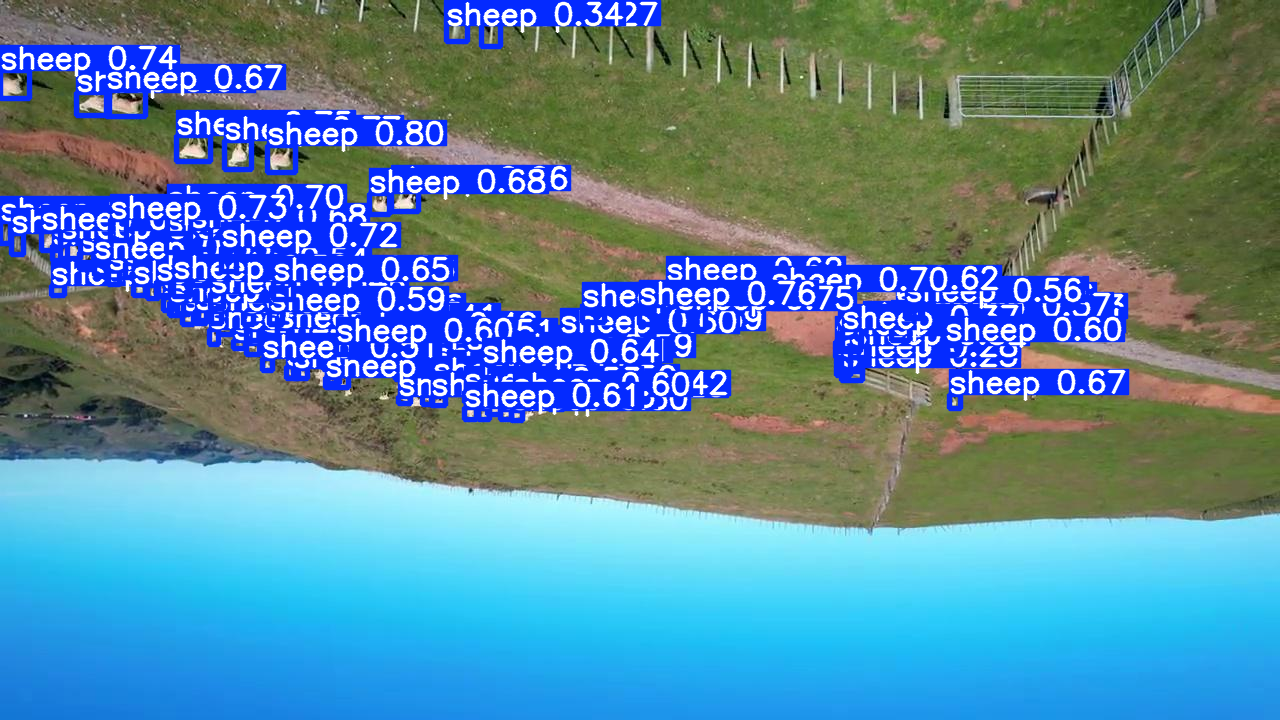

In [ ]:
# Load trained model
model = YOLO("runs/detect/train18/weights/best.pt")  # or 'best.pt' if in current dir

# Run inference
results = model.predict(
    source='combined_custom_dataset_yolo/test/images/frame_00111_rot180.jpg',  # or a folder of images
    imgsz=640,                   # match training size
    conf=0.25,                   # confidence threshold
    device=0                     # use GPU 0 (or 'cpu' if no GPU)
)

# Show result(s)
results[0].show()

# Optional: save results to runs/predict/
# results[0].save()


## Process Video

In [ ]:
!pip install -r requirements.txt

  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Preparing metadata (setup.py) ... done
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 8.2 MB/s eta 0:00:00a 0:00:01mm
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110545 sha256=4f719e3c0fc34d4bdf158474bcf2371c6e49feb6e89b46d85e4a1f521d6226e9
  Stored in directory: /home/sagemaker-user/.cache/pip/wheels/77/bf/4c/b0c3f4798a0166668752312a67118b27a3cd341e13ac0ae6ee
Successfully built filterpy


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from ultralytics import YOLO
from torchvision import transforms
from norfair import Detection, Tracker
import torch
import torchvision
import torch.nn as nn


# ===== Customize these =====
INPUT_VIDEO = "video_04"
safe_name = INPUT_VIDEO.replace(" ", "_")
INPUT_VIDEO_PATH = os.path.join("videos", f"{INPUT_VIDEO}.mp4")
OUTPUT_VIDEO_PATH = os.path.join("outputs", f"{safe_name}_norfair.avi")

# Load YOLO model
model = YOLO("runs/detect/train18/weights/best.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image transform (YOLOv8 handles this internally but we use it to convert to RGB)
transform = transforms.ToTensor()
print(model.names)  # Should include 'sheep'


# Custom distance function based on center points
def custom_distance(detection, tracked_object):
    det_center = detection.points[0]
    trk_center = tracked_object.estimate[0]
    return np.linalg.norm(det_center - trk_center)

# Initialise Norfair tracker with center-based distance
tracker = Tracker(
    distance_function=custom_distance,
    distance_threshold=30,  # Higher for center-only tracking
    hit_counter_max=60,
    initialization_delay=3
)

# Open video
cap = cv2.VideoCapture(INPUT_VIDEO_PATH)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

os.makedirs("outputs", exist_ok=True)
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter(OUTPUT_VIDEO_PATH, fourcc, fps, (width, height))

if not out.isOpened():
    raise RuntimeError(f"Failed to open VideoWriter with path: {OUTPUT_VIDEO_PATH}")

# Store unique ids
unique_ids = set()

# Process video with progress bar
with tqdm(total=total_frames, desc="Processing Video") as pbar:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = model(image)[0]  # Use raw RGB NumPy array


        detections = []
        boxes = results.boxes  # results = model(image)[0]

        for i in range(len(boxes)):
            # print(boxes[i])
            box = boxes.xyxy[i].cpu().numpy()           # [x1, y1, x2, y2]
            score = boxes.conf[i].item()                # confidence
            label = int(boxes.cls[i].item())
            # class index (e.g., 0 for sheep)
            # print(box)
            # print(score)
            # print(label)
            if score > 0.7:
                # box = box.to("cpu").numpy()
                x1, y1, x2, y2 = box
                cx = (x1 + x2) / 2
                cy = (y1 + y2) / 2
                detections.append(Detection(points=np.array([[cx, cy]]), scores=np.array([score]), data=box))
        # Update tracker
        print("detections: ", len(detections))
        tracked_objects = tracker.update(detections=detections)
        print("tracked_objects: ", len(tracked_objects))

        for obj in tracked_objects:
            unique_ids.add(obj.id)
            # Retrieve original box from detection data (optional fallback)
            if hasattr(obj.last_detection, "data"):
                x1, y1, x2, y2 = obj.last_detection.data
            else:
                cx, cy = obj.estimate[0]
                x1, y1, x2, y2 = cx - 20, cy - 20, cx + 20, cy + 20  # fallback size

            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
            center_x = (x1 + x2) / 2
            center_y = (y1 + y2) / 2
            cv2.putText(frame, f"Sheep #{obj.id}", (int(center_x), int(center_y) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

        out.write(frame)
        pbar.update(1)

print(f"Total unique tracked sheep: {len(unique_ids)}") # There is approx 110 sheep in the sample videos

cap.release()
out.release()


{0: 'sheep'}


Processing Video:   0%|          | 0/307 [00:00<?, ?it/s]


0: 576x1024 153 sheeps, 1902.6ms
Speed: 5.5ms preprocess, 1902.6ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   0%|          | 1/307 [00:02<13:47,  2.70s/it]

detections:  153
tracked_objects:  0

0: 576x1024 154 sheeps, 1875.0ms
Speed: 6.4ms preprocess, 1875.0ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   1%|          | 2/307 [00:04<11:54,  2.34s/it]

detections:  154
tracked_objects:  0

0: 576x1024 151 sheeps, 1934.1ms
Speed: 5.6ms preprocess, 1934.1ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  151


Processing Video:   1%|          | 3/307 [00:07<11:34,  2.29s/it]

tracked_objects:  0

0: 576x1024 154 sheeps, 1889.0ms
Speed: 5.4ms preprocess, 1889.0ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  154


Processing Video:   1%|▏         | 4/307 [00:09<11:19,  2.24s/it]

tracked_objects:  147

0: 576x1024 153 sheeps, 1896.9ms
Speed: 5.5ms preprocess, 1896.9ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  153


Processing Video:   2%|▏         | 5/307 [00:11<11:10,  2.22s/it]

tracked_objects:  147

0: 576x1024 149 sheeps, 1926.3ms
Speed: 5.1ms preprocess, 1926.3ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  149


Processing Video:   2%|▏         | 6/307 [00:13<11:07,  2.22s/it]

tracked_objects:  147

0: 576x1024 151 sheeps, 1922.9ms
Speed: 5.8ms preprocess, 1922.9ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   2%|▏         | 7/307 [00:15<10:57,  2.19s/it]

detections:  151
tracked_objects:  147

0: 576x1024 147 sheeps, 1950.9ms
Speed: 5.6ms preprocess, 1950.9ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  147


Processing Video:   3%|▎         | 8/307 [00:17<10:59,  2.21s/it]

tracked_objects:  149

0: 576x1024 140 sheeps, 1912.2ms
Speed: 7.7ms preprocess, 1912.2ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   3%|▎         | 9/307 [00:20<10:49,  2.18s/it]

detections:  140
tracked_objects:  149

0: 576x1024 141 sheeps, 1909.7ms
Speed: 7.3ms preprocess, 1909.7ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   3%|▎         | 10/307 [00:22<10:41,  2.16s/it]

detections:  141
tracked_objects:  149

0: 576x1024 147 sheeps, 1907.7ms
Speed: 5.3ms preprocess, 1907.7ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  147


Processing Video:   4%|▎         | 11/307 [00:24<10:42,  2.17s/it]

tracked_objects:  150

0: 576x1024 143 sheeps, 1884.1ms
Speed: 7.5ms preprocess, 1884.1ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   4%|▍         | 12/307 [00:26<10:32,  2.15s/it]

detections:  143
tracked_objects:  150

0: 576x1024 139 sheeps, 1888.5ms
Speed: 7.4ms preprocess, 1888.5ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:   4%|▍         | 13/307 [00:28<10:32,  2.15s/it]

tracked_objects:  151

0: 576x1024 140 sheeps, 1878.5ms
Speed: 5.4ms preprocess, 1878.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   5%|▍         | 14/307 [00:30<10:24,  2.13s/it]

detections:  140
tracked_objects:  151

0: 576x1024 143 sheeps, 1901.4ms
Speed: 5.5ms preprocess, 1901.4ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:   5%|▍         | 15/307 [00:32<10:26,  2.15s/it]

tracked_objects:  149

0: 576x1024 139 sheeps, 1891.4ms
Speed: 5.3ms preprocess, 1891.4ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:   5%|▌         | 16/307 [00:35<10:26,  2.15s/it]

tracked_objects:  149

0: 576x1024 142 sheeps, 1903.5ms
Speed: 5.3ms preprocess, 1903.5ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:   6%|▌         | 17/307 [00:37<10:26,  2.16s/it]

tracked_objects:  145

0: 576x1024 138 sheeps, 1861.8ms
Speed: 7.3ms preprocess, 1861.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   6%|▌         | 18/307 [00:39<10:15,  2.13s/it]

detections:  138
tracked_objects:  145

0: 576x1024 138 sheeps, 1872.6ms
Speed: 6.5ms preprocess, 1872.6ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:   6%|▌         | 19/307 [00:41<10:14,  2.13s/it]

tracked_objects:  144

0: 576x1024 138 sheeps, 1846.8ms
Speed: 7.6ms preprocess, 1846.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   7%|▋         | 20/307 [00:43<10:04,  2.11s/it]

detections:  138
tracked_objects:  144

0: 576x1024 136 sheeps, 1839.5ms
Speed: 7.3ms preprocess, 1839.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   7%|▋         | 21/307 [00:45<09:56,  2.09s/it]

detections:  136
tracked_objects:  143

0: 576x1024 137 sheeps, 1912.5ms
Speed: 6.6ms preprocess, 1912.5ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:   7%|▋         | 22/307 [00:47<10:02,  2.11s/it]

tracked_objects:  143

0: 576x1024 134 sheeps, 1929.8ms
Speed: 5.5ms preprocess, 1929.8ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  134


Processing Video:   7%|▋         | 23/307 [00:49<10:07,  2.14s/it]

tracked_objects:  143

0: 576x1024 134 sheeps, 1930.4ms
Speed: 5.6ms preprocess, 1930.4ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  134


Processing Video:   8%|▊         | 24/307 [00:52<10:09,  2.15s/it]

tracked_objects:  142

0: 576x1024 142 sheeps, 1915.2ms
Speed: 7.7ms preprocess, 1915.2ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   8%|▊         | 25/307 [00:54<10:04,  2.14s/it]

detections:  142
tracked_objects:  143

0: 576x1024 144 sheeps, 1920.7ms
Speed: 7.6ms preprocess, 1920.7ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:   8%|▊         | 26/307 [00:56<10:06,  2.16s/it]

tracked_objects:  143

0: 576x1024 136 sheeps, 1965.9ms
Speed: 5.3ms preprocess, 1965.9ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   9%|▉         | 27/307 [00:58<10:04,  2.16s/it]

detections:  136
tracked_objects:  144

0: 576x1024 141 sheeps, 1931.0ms
Speed: 5.8ms preprocess, 1931.0ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   9%|▉         | 28/307 [01:00<09:59,  2.15s/it]

detections:  141
tracked_objects:  143

0: 576x1024 145 sheeps, 1930.8ms
Speed: 9.3ms preprocess, 1930.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:   9%|▉         | 29/307 [01:02<09:56,  2.15s/it]

detections:  145
tracked_objects:  145

0: 576x1024 144 sheeps, 1923.2ms
Speed: 7.7ms preprocess, 1923.2ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  10%|▉         | 30/307 [01:04<09:53,  2.14s/it]

detections:  144
tracked_objects:  145

0: 576x1024 147 sheeps, 1904.4ms
Speed: 7.5ms preprocess, 1904.4ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  10%|█         | 31/307 [01:07<09:49,  2.14s/it]

detections:  147
tracked_objects:  145

0: 576x1024 145 sheeps, 1922.5ms
Speed: 7.2ms preprocess, 1922.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  10%|█         | 32/307 [01:09<09:46,  2.13s/it]

detections:  145
tracked_objects:  146

0: 576x1024 148 sheeps, 1918.8ms
Speed: 6.1ms preprocess, 1918.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  148


Processing Video:  11%|█         | 33/307 [01:11<09:49,  2.15s/it]

tracked_objects:  146

0: 576x1024 145 sheeps, 1883.3ms
Speed: 7.4ms preprocess, 1883.3ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  11%|█         | 34/307 [01:13<09:42,  2.13s/it]

detections:  145
tracked_objects:  147

0: 576x1024 143 sheeps, 1898.6ms
Speed: 7.4ms preprocess, 1898.6ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  11%|█▏        | 35/307 [01:15<09:44,  2.15s/it]

tracked_objects:  147

0: 576x1024 144 sheeps, 1912.3ms
Speed: 5.9ms preprocess, 1912.3ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  12%|█▏        | 36/307 [01:17<09:39,  2.14s/it]

detections:  144
tracked_objects:  147

0: 576x1024 146 sheeps, 1912.3ms
Speed: 6.9ms preprocess, 1912.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146


Processing Video:  12%|█▏        | 37/307 [01:19<09:41,  2.15s/it]

tracked_objects:  146

0: 576x1024 143 sheeps, 1839.2ms
Speed: 8.0ms preprocess, 1839.2ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  12%|█▏        | 38/307 [01:22<09:35,  2.14s/it]

tracked_objects:  146

0: 576x1024 143 sheeps, 1764.7ms
Speed: 5.5ms preprocess, 1764.7ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  13%|█▎        | 39/307 [01:24<09:24,  2.10s/it]

tracked_objects:  146

0: 576x1024 143 sheeps, 1770.8ms
Speed: 5.2ms preprocess, 1770.8ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  13%|█▎        | 40/307 [01:26<09:16,  2.08s/it]

tracked_objects:  147

0: 576x1024 144 sheeps, 1764.5ms
Speed: 5.5ms preprocess, 1764.5ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:  13%|█▎        | 41/307 [01:28<09:09,  2.07s/it]

tracked_objects:  146

0: 576x1024 146 sheeps, 1755.2ms
Speed: 5.3ms preprocess, 1755.2ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146


Processing Video:  14%|█▎        | 42/307 [01:30<09:04,  2.05s/it]

tracked_objects:  146

0: 576x1024 150 sheeps, 1727.1ms
Speed: 7.5ms preprocess, 1727.1ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  14%|█▍        | 43/307 [01:32<08:51,  2.01s/it]

detections:  150
tracked_objects:  146

0: 576x1024 147 sheeps, 1727.9ms
Speed: 5.7ms preprocess, 1727.9ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  14%|█▍        | 44/307 [01:34<08:42,  1.99s/it]

detections:  147
tracked_objects:  146

0: 576x1024 142 sheeps, 1725.7ms
Speed: 5.8ms preprocess, 1725.7ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  15%|█▍        | 45/307 [01:35<08:35,  1.97s/it]

detections:  142
tracked_objects:  147

0: 576x1024 139 sheeps, 1744.4ms
Speed: 6.6ms preprocess, 1744.4ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  15%|█▍        | 46/307 [01:37<08:36,  1.98s/it]

tracked_objects:  148

0: 576x1024 144 sheeps, 1733.9ms
Speed: 7.5ms preprocess, 1733.9ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:  15%|█▌        | 47/307 [01:39<08:35,  1.98s/it]

tracked_objects:  149

0: 576x1024 144 sheeps, 1730.3ms
Speed: 7.3ms preprocess, 1730.3ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  16%|█▌        | 48/307 [01:41<08:29,  1.97s/it]

detections:  144
tracked_objects:  149

0: 576x1024 140 sheeps, 1726.0ms
Speed: 7.4ms preprocess, 1726.0ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  16%|█▌        | 49/307 [01:43<08:23,  1.95s/it]

detections:  140
tracked_objects:  149

0: 576x1024 141 sheeps, 1910.4ms
Speed: 6.7ms preprocess, 1910.4ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  16%|█▋        | 50/307 [01:46<08:39,  2.02s/it]

tracked_objects:  150

0: 576x1024 145 sheeps, 1769.3ms
Speed: 6.0ms preprocess, 1769.3ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  17%|█▋        | 51/307 [01:48<08:38,  2.03s/it]

tracked_objects:  150

0: 576x1024 145 sheeps, 1737.5ms
Speed: 7.3ms preprocess, 1737.5ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  17%|█▋        | 52/307 [01:50<08:35,  2.02s/it]

tracked_objects:  150

0: 576x1024 147 sheeps, 1724.9ms
Speed: 7.4ms preprocess, 1724.9ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  17%|█▋        | 53/307 [01:51<08:25,  1.99s/it]

detections:  147
tracked_objects:  150

0: 576x1024 142 sheeps, 1723.6ms
Speed: 7.3ms preprocess, 1723.6ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  18%|█▊        | 54/307 [01:53<08:17,  1.97s/it]

detections:  142
tracked_objects:  151

0: 576x1024 149 sheeps, 1745.5ms
Speed: 6.5ms preprocess, 1745.5ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  149


Processing Video:  18%|█▊        | 55/307 [01:55<08:19,  1.98s/it]

tracked_objects:  151

0: 576x1024 147 sheeps, 1744.3ms
Speed: 5.3ms preprocess, 1744.3ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  147


Processing Video:  18%|█▊        | 56/307 [01:57<08:19,  1.99s/it]

tracked_objects:  151

0: 576x1024 142 sheeps, 1744.3ms
Speed: 5.2ms preprocess, 1744.3ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  19%|█▊        | 57/307 [01:59<08:13,  1.97s/it]

detections:  142
tracked_objects:  151

0: 576x1024 146 sheeps, 1722.8ms
Speed: 7.3ms preprocess, 1722.8ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  19%|█▉        | 58/307 [02:01<08:07,  1.96s/it]

detections:  146
tracked_objects:  152

0: 576x1024 144 sheeps, 1738.2ms
Speed: 6.5ms preprocess, 1738.2ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:  19%|█▉        | 59/307 [02:03<08:08,  1.97s/it]

tracked_objects:  152

0: 576x1024 141 sheeps, 1742.1ms
Speed: 5.2ms preprocess, 1742.1ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  20%|█▉        | 60/307 [02:05<08:09,  1.98s/it]

tracked_objects:  152

0: 576x1024 142 sheeps, 1738.1ms
Speed: 5.5ms preprocess, 1738.1ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  20%|█▉        | 61/307 [02:07<08:08,  1.99s/it]

tracked_objects:  152

0: 576x1024 141 sheeps, 1746.8ms
Speed: 5.2ms preprocess, 1746.8ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  20%|██        | 62/307 [02:09<08:08,  1.99s/it]

tracked_objects:  152

0: 576x1024 140 sheeps, 1738.5ms
Speed: 5.3ms preprocess, 1738.5ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  21%|██        | 63/307 [02:11<08:06,  1.99s/it]

tracked_objects:  152

0: 576x1024 137 sheeps, 1739.8ms
Speed: 5.1ms preprocess, 1739.8ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:  21%|██        | 64/307 [02:13<08:04,  2.00s/it]

tracked_objects:  152

0: 576x1024 140 sheeps, 1738.0ms
Speed: 6.5ms preprocess, 1738.0ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  21%|██        | 65/307 [02:15<08:03,  2.00s/it]

tracked_objects:  152

0: 576x1024 140 sheeps, 1745.0ms
Speed: 5.3ms preprocess, 1745.0ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  21%|██▏       | 66/307 [02:17<08:01,  2.00s/it]

tracked_objects:  153

0: 576x1024 144 sheeps, 1748.8ms
Speed: 6.9ms preprocess, 1748.8ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  22%|██▏       | 67/307 [02:19<07:55,  1.98s/it]

detections:  144
tracked_objects:  153

0: 576x1024 145 sheeps, 1744.1ms
Speed: 6.5ms preprocess, 1744.1ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  22%|██▏       | 68/307 [02:21<07:56,  1.99s/it]

tracked_objects:  153

0: 576x1024 143 sheeps, 1748.5ms
Speed: 5.8ms preprocess, 1748.5ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  22%|██▏       | 69/307 [02:23<07:55,  2.00s/it]

tracked_objects:  152

0: 576x1024 145 sheeps, 1724.2ms
Speed: 6.5ms preprocess, 1724.2ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  23%|██▎       | 70/307 [02:25<07:48,  1.98s/it]

detections:  145
tracked_objects:  151

0: 576x1024 149 sheeps, 1724.2ms
Speed: 6.7ms preprocess, 1724.2ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)
detections:  149
tracked_objects:  151


Processing Video:  23%|██▎       | 71/307 [02:27<07:44,  1.97s/it]


0: 576x1024 146 sheeps, 1743.9ms
Speed: 5.2ms preprocess, 1743.9ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146


Processing Video:  23%|██▎       | 72/307 [02:29<07:45,  1.98s/it]

tracked_objects:  151

0: 576x1024 143 sheeps, 1737.7ms
Speed: 7.5ms preprocess, 1737.7ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  24%|██▍       | 73/307 [02:31<07:40,  1.97s/it]

detections:  143
tracked_objects:  150

0: 576x1024 143 sheeps, 1744.2ms
Speed: 6.7ms preprocess, 1744.2ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  24%|██▍       | 74/307 [02:33<07:41,  1.98s/it]

tracked_objects:  151

0: 576x1024 141 sheeps, 1747.0ms
Speed: 5.4ms preprocess, 1747.0ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  24%|██▍       | 75/307 [02:35<07:36,  1.97s/it]

detections:  141
tracked_objects:  151

0: 576x1024 141 sheeps, 1741.8ms
Speed: 7.1ms preprocess, 1741.8ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  25%|██▍       | 76/307 [02:37<07:32,  1.96s/it]

detections:  141
tracked_objects:  151

0: 576x1024 141 sheeps, 1718.7ms
Speed: 7.6ms preprocess, 1718.7ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  25%|██▌       | 77/307 [02:39<07:26,  1.94s/it]

detections:  141
tracked_objects:  150

0: 576x1024 141 sheeps, 1746.9ms
Speed: 6.5ms preprocess, 1746.9ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  25%|██▌       | 78/307 [02:41<07:29,  1.96s/it]

tracked_objects:  150

0: 576x1024 139 sheeps, 1741.9ms
Speed: 7.2ms preprocess, 1741.9ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  26%|██▌       | 79/307 [02:43<07:30,  1.98s/it]

tracked_objects:  150

0: 576x1024 140 sheeps, 1758.9ms
Speed: 5.2ms preprocess, 1758.9ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  26%|██▌       | 80/307 [02:45<07:31,  1.99s/it]

tracked_objects:  150

0: 576x1024 141 sheeps, 1737.0ms
Speed: 5.2ms preprocess, 1737.0ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  26%|██▋       | 81/307 [02:47<07:30,  1.99s/it]

tracked_objects:  151

0: 576x1024 143 sheeps, 1751.7ms
Speed: 8.3ms preprocess, 1751.7ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  27%|██▋       | 82/307 [02:49<07:24,  1.98s/it]

detections:  143
tracked_objects:  151

0: 576x1024 138 sheeps, 1731.1ms
Speed: 6.5ms preprocess, 1731.1ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  27%|██▋       | 83/307 [02:51<07:23,  1.98s/it]

tracked_objects:  151

0: 576x1024 140 sheeps, 1741.7ms
Speed: 5.4ms preprocess, 1741.7ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  27%|██▋       | 84/307 [02:53<07:23,  1.99s/it]

tracked_objects:  151

0: 576x1024 140 sheeps, 1739.1ms
Speed: 5.1ms preprocess, 1739.1ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  28%|██▊       | 85/307 [02:55<07:21,  1.99s/it]

tracked_objects:  151

0: 576x1024 141 sheeps, 1742.7ms
Speed: 5.3ms preprocess, 1742.7ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  28%|██▊       | 86/307 [02:57<07:20,  1.99s/it]

tracked_objects:  151

0: 576x1024 140 sheeps, 1740.8ms
Speed: 5.1ms preprocess, 1740.8ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  28%|██▊       | 87/307 [02:59<07:19,  2.00s/it]

tracked_objects:  152

0: 576x1024 139 sheeps, 1732.7ms
Speed: 5.1ms preprocess, 1732.7ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  29%|██▊       | 88/307 [03:01<07:12,  1.98s/it]

detections:  139
tracked_objects:  152

0: 576x1024 141 sheeps, 1738.2ms
Speed: 6.7ms preprocess, 1738.2ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  29%|██▉       | 89/307 [03:03<07:12,  1.98s/it]

tracked_objects:  152

0: 576x1024 137 sheeps, 1726.4ms
Speed: 9.0ms preprocess, 1726.4ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  29%|██▉       | 90/307 [03:05<07:05,  1.96s/it]

detections:  137
tracked_objects:  152

0: 576x1024 139 sheeps, 1727.6ms
Speed: 7.3ms preprocess, 1727.6ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  30%|██▉       | 91/307 [03:07<07:00,  1.95s/it]

detections:  139
tracked_objects:  152

0: 576x1024 137 sheeps, 1728.8ms
Speed: 7.4ms preprocess, 1728.8ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  30%|██▉       | 92/307 [03:09<06:57,  1.94s/it]

detections:  137
tracked_objects:  151

0: 576x1024 142 sheeps, 1727.4ms
Speed: 5.3ms preprocess, 1727.4ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  30%|███       | 93/307 [03:11<06:58,  1.96s/it]

tracked_objects:  151

0: 576x1024 140 sheeps, 1733.3ms
Speed: 7.4ms preprocess, 1733.3ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  31%|███       | 94/307 [03:13<06:59,  1.97s/it]

tracked_objects:  151

0: 576x1024 139 sheeps, 1735.8ms
Speed: 5.5ms preprocess, 1735.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  31%|███       | 95/307 [03:14<06:54,  1.96s/it]

detections:  139
tracked_objects:  151

0: 576x1024 140 sheeps, 1681.3ms
Speed: 6.3ms preprocess, 1681.3ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  31%|███▏      | 96/307 [03:16<06:47,  1.93s/it]

detections:  140
tracked_objects:  151

0: 576x1024 140 sheeps, 1724.3ms
Speed: 7.6ms preprocess, 1724.3ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  32%|███▏      | 97/307 [03:18<06:49,  1.95s/it]

tracked_objects:  151

0: 576x1024 139 sheeps, 1720.6ms
Speed: 5.4ms preprocess, 1720.6ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  32%|███▏      | 98/307 [03:20<06:44,  1.94s/it]

detections:  139
tracked_objects:  152

0: 576x1024 136 sheeps, 1724.4ms
Speed: 5.9ms preprocess, 1724.4ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  32%|███▏      | 99/307 [03:22<06:41,  1.93s/it]

detections:  136
tracked_objects:  151

0: 576x1024 139 sheeps, 1720.5ms
Speed: 6.6ms preprocess, 1720.5ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  33%|███▎      | 100/307 [03:24<06:38,  1.93s/it]

detections:  139
tracked_objects:  151

0: 576x1024 137 sheeps, 1732.8ms
Speed: 7.4ms preprocess, 1732.8ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:  33%|███▎      | 101/307 [03:26<06:40,  1.95s/it]

tracked_objects:  151

0: 576x1024 141 sheeps, 1734.6ms
Speed: 5.4ms preprocess, 1734.6ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  33%|███▎      | 102/307 [03:28<06:41,  1.96s/it]

tracked_objects:  152

0: 576x1024 139 sheeps, 1746.6ms
Speed: 5.2ms preprocess, 1746.6ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  34%|███▎      | 103/307 [03:30<06:42,  1.97s/it]

tracked_objects:  152

0: 576x1024 136 sheeps, 1741.5ms
Speed: 6.0ms preprocess, 1741.5ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  136


Processing Video:  34%|███▍      | 104/307 [03:32<06:42,  1.98s/it]

tracked_objects:  151

0: 576x1024 136 sheeps, 1742.0ms
Speed: 5.2ms preprocess, 1742.0ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  136


Processing Video:  34%|███▍      | 105/307 [03:34<06:41,  1.99s/it]

tracked_objects:  150

0: 576x1024 139 sheeps, 1746.3ms
Speed: 6.7ms preprocess, 1746.3ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  35%|███▍      | 106/307 [03:36<06:40,  1.99s/it]

tracked_objects:  150

0: 576x1024 138 sheeps, 1739.2ms
Speed: 6.4ms preprocess, 1739.2ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  35%|███▍      | 107/307 [03:38<06:39,  2.00s/it]

tracked_objects:  149

0: 576x1024 138 sheeps, 1733.7ms
Speed: 5.4ms preprocess, 1733.7ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  35%|███▌      | 108/307 [03:40<06:32,  1.97s/it]

detections:  138
tracked_objects:  149

0: 576x1024 138 sheeps, 1723.4ms
Speed: 7.9ms preprocess, 1723.4ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  36%|███▌      | 109/307 [03:42<06:27,  1.96s/it]

detections:  138
tracked_objects:  149

0: 576x1024 140 sheeps, 1733.0ms
Speed: 7.6ms preprocess, 1733.0ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  36%|███▌      | 110/307 [03:44<06:27,  1.97s/it]

tracked_objects:  149

0: 576x1024 139 sheeps, 1745.6ms
Speed: 5.5ms preprocess, 1745.6ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  36%|███▌      | 111/307 [03:46<06:27,  1.98s/it]

tracked_objects:  148

0: 576x1024 140 sheeps, 1732.7ms
Speed: 7.2ms preprocess, 1732.7ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  36%|███▋      | 112/307 [03:48<06:26,  1.98s/it]

tracked_objects:  149

0: 576x1024 139 sheeps, 1761.8ms
Speed: 5.4ms preprocess, 1761.8ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  37%|███▋      | 113/307 [03:50<06:26,  1.99s/it]

tracked_objects:  149

0: 576x1024 139 sheeps, 1741.3ms
Speed: 7.6ms preprocess, 1741.3ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  37%|███▋      | 114/307 [03:52<06:21,  1.98s/it]

detections:  139
tracked_objects:  149

0: 576x1024 141 sheeps, 1762.2ms
Speed: 6.5ms preprocess, 1762.2ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  37%|███▋      | 115/307 [03:54<06:22,  1.99s/it]

tracked_objects:  149

0: 576x1024 142 sheeps, 1868.7ms
Speed: 7.4ms preprocess, 1868.7ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  38%|███▊      | 116/307 [03:56<06:25,  2.02s/it]

detections:  142
tracked_objects:  149

0: 576x1024 141 sheeps, 1885.2ms
Speed: 6.2ms preprocess, 1885.2ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  38%|███▊      | 117/307 [03:58<06:30,  2.06s/it]

tracked_objects:  149

0: 576x1024 140 sheeps, 1813.5ms
Speed: 5.2ms preprocess, 1813.5ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  38%|███▊      | 118/307 [04:00<06:30,  2.06s/it]

tracked_objects:  149

0: 576x1024 138 sheeps, 1945.9ms
Speed: 7.5ms preprocess, 1945.9ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  39%|███▉      | 119/307 [04:02<06:37,  2.11s/it]

tracked_objects:  149

0: 576x1024 140 sheeps, 1954.3ms
Speed: 5.5ms preprocess, 1954.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  39%|███▉      | 120/307 [04:05<06:41,  2.15s/it]

tracked_objects:  150

0: 576x1024 139 sheeps, 1941.4ms
Speed: 5.5ms preprocess, 1941.4ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  39%|███▉      | 121/307 [04:07<06:39,  2.15s/it]

detections:  139
tracked_objects:  150

0: 576x1024 141 sheeps, 1975.3ms
Speed: 5.7ms preprocess, 1975.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  40%|███▉      | 122/307 [04:09<06:43,  2.18s/it]

tracked_objects:  150

0: 576x1024 141 sheeps, 1980.9ms
Speed: 7.5ms preprocess, 1980.9ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141
tracked_objects:  150


Processing Video:  40%|████      | 123/307 [04:11<06:42,  2.19s/it]


0: 576x1024 138 sheeps, 1973.0ms
Speed: 5.4ms preprocess, 1973.0ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  40%|████      | 124/307 [04:13<06:43,  2.21s/it]

tracked_objects:  150

0: 576x1024 147 sheeps, 1970.0ms
Speed: 5.4ms preprocess, 1970.0ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)
detections:  147
tracked_objects:  151


Processing Video:  41%|████      | 125/307 [04:16<06:40,  2.20s/it]


0: 576x1024 143 sheeps, 1970.6ms
Speed: 5.4ms preprocess, 1970.6ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  41%|████      | 126/307 [04:18<06:41,  2.22s/it]

tracked_objects:  152

0: 576x1024 145 sheeps, 1966.9ms
Speed: 7.5ms preprocess, 1966.9ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  41%|████▏     | 127/307 [04:20<06:41,  2.23s/it]

tracked_objects:  153

0: 576x1024 146 sheeps, 1969.6ms
Speed: 5.3ms preprocess, 1969.6ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146
tracked_objects:  153


Processing Video:  42%|████▏     | 128/307 [04:22<06:36,  2.22s/it]


0: 576x1024 147 sheeps, 1937.8ms
Speed: 5.6ms preprocess, 1937.8ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)
detections:  147
tracked_objects:  153


Processing Video:  42%|████▏     | 129/307 [04:25<06:31,  2.20s/it]


0: 576x1024 145 sheeps, 1971.4ms
Speed: 5.4ms preprocess, 1971.4ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145
tracked_objects:  152


Processing Video:  42%|████▏     | 130/307 [04:27<06:28,  2.20s/it]


0: 576x1024 146 sheeps, 1967.1ms
Speed: 5.8ms preprocess, 1967.1ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146


Processing Video:  43%|████▎     | 131/307 [04:29<06:29,  2.21s/it]

tracked_objects:  153

0: 576x1024 147 sheeps, 1958.7ms
Speed: 5.6ms preprocess, 1958.7ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  147


Processing Video:  43%|████▎     | 132/307 [04:31<06:29,  2.22s/it]

tracked_objects:  154

0: 576x1024 143 sheeps, 1975.2ms
Speed: 5.7ms preprocess, 1975.2ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  43%|████▎     | 133/307 [04:33<06:29,  2.24s/it]

tracked_objects:  153

0: 576x1024 145 sheeps, 1988.5ms
Speed: 7.6ms preprocess, 1988.5ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  44%|████▎     | 134/307 [04:36<06:29,  2.25s/it]

tracked_objects:  153

0: 576x1024 143 sheeps, 1979.7ms
Speed: 5.7ms preprocess, 1979.7ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  44%|████▍     | 135/307 [04:38<06:27,  2.25s/it]

tracked_objects:  153

0: 576x1024 143 sheeps, 1955.7ms
Speed: 7.4ms preprocess, 1955.7ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143
tracked_objects:  154


Processing Video:  44%|████▍     | 136/307 [04:40<06:21,  2.23s/it]


0: 576x1024 143 sheeps, 1965.9ms
Speed: 5.6ms preprocess, 1965.9ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  45%|████▍     | 137/307 [04:42<06:20,  2.24s/it]

tracked_objects:  155

0: 576x1024 141 sheeps, 1960.3ms
Speed: 5.6ms preprocess, 1960.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  45%|████▍     | 138/307 [04:45<06:18,  2.24s/it]

tracked_objects:  154

0: 576x1024 140 sheeps, 1973.1ms
Speed: 5.4ms preprocess, 1973.1ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  45%|████▌     | 139/307 [04:47<06:16,  2.24s/it]

tracked_objects:  153

0: 576x1024 142 sheeps, 1973.6ms
Speed: 5.4ms preprocess, 1973.6ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  46%|████▌     | 140/307 [04:49<06:15,  2.25s/it]

tracked_objects:  154

0: 576x1024 138 sheeps, 1955.8ms
Speed: 5.7ms preprocess, 1955.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  46%|████▌     | 141/307 [04:51<06:08,  2.22s/it]

detections:  138
tracked_objects:  154

0: 576x1024 134 sheeps, 1974.9ms
Speed: 5.6ms preprocess, 1974.9ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  134


Processing Video:  46%|████▋     | 142/307 [04:54<06:07,  2.23s/it]

tracked_objects:  154

0: 576x1024 136 sheeps, 1964.9ms
Speed: 5.8ms preprocess, 1964.9ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  136


Processing Video:  47%|████▋     | 143/307 [04:56<06:06,  2.23s/it]

tracked_objects:  154

0: 576x1024 134 sheeps, 1955.5ms
Speed: 7.6ms preprocess, 1955.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  47%|████▋     | 144/307 [04:58<06:00,  2.21s/it]

detections:  134
tracked_objects:  152

0: 576x1024 137 sheeps, 1936.9ms
Speed: 6.6ms preprocess, 1936.9ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  47%|████▋     | 145/307 [05:00<05:54,  2.19s/it]

detections:  137
tracked_objects:  152

0: 576x1024 136 sheeps, 1908.9ms
Speed: 6.2ms preprocess, 1908.9ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  136


Processing Video:  48%|████▊     | 146/307 [05:02<05:52,  2.19s/it]

tracked_objects:  152

0: 576x1024 135 sheeps, 1935.3ms
Speed: 8.9ms preprocess, 1935.3ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  135


Processing Video:  48%|████▊     | 147/307 [05:05<05:51,  2.19s/it]

tracked_objects:  152

0: 576x1024 138 sheeps, 1954.7ms
Speed: 5.5ms preprocess, 1954.7ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  48%|████▊     | 148/307 [05:07<05:50,  2.21s/it]

tracked_objects:  152

0: 576x1024 140 sheeps, 1905.3ms
Speed: 5.3ms preprocess, 1905.3ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  49%|████▊     | 149/307 [05:09<05:47,  2.20s/it]

tracked_objects:  152

0: 576x1024 136 sheeps, 1935.0ms
Speed: 7.5ms preprocess, 1935.0ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  136


Processing Video:  49%|████▉     | 150/307 [05:11<05:45,  2.20s/it]

tracked_objects:  152

0: 576x1024 137 sheeps, 1949.4ms
Speed: 5.5ms preprocess, 1949.4ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:  49%|████▉     | 151/307 [05:13<05:44,  2.21s/it]

tracked_objects:  151

0: 576x1024 141 sheeps, 1942.9ms
Speed: 7.5ms preprocess, 1942.9ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  50%|████▉     | 152/307 [05:16<05:43,  2.21s/it]

tracked_objects:  152

0: 576x1024 142 sheeps, 1995.4ms
Speed: 8.8ms preprocess, 1995.4ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  50%|████▉     | 153/307 [05:18<05:44,  2.23s/it]

tracked_objects:  152

0: 576x1024 136 sheeps, 1943.3ms
Speed: 7.7ms preprocess, 1943.3ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  50%|█████     | 154/307 [05:20<05:38,  2.21s/it]

detections:  136
tracked_objects:  152

0: 576x1024 138 sheeps, 1991.3ms
Speed: 5.8ms preprocess, 1991.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  50%|█████     | 155/307 [05:22<05:38,  2.23s/it]

tracked_objects:  152

0: 576x1024 137 sheeps, 1963.5ms
Speed: 5.5ms preprocess, 1963.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137
tracked_objects:  152


Processing Video:  51%|█████     | 156/307 [05:24<05:34,  2.21s/it]


0: 576x1024 135 sheeps, 1968.0ms
Speed: 5.6ms preprocess, 1968.0ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  135


Processing Video:  51%|█████     | 157/307 [05:27<05:33,  2.22s/it]

tracked_objects:  150

0: 576x1024 142 sheeps, 1956.5ms
Speed: 5.6ms preprocess, 1956.5ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  51%|█████▏    | 158/307 [05:29<05:31,  2.23s/it]

tracked_objects:  150

0: 576x1024 145 sheeps, 1931.3ms
Speed: 7.6ms preprocess, 1931.3ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  52%|█████▏    | 159/307 [05:31<05:25,  2.20s/it]

detections:  145
tracked_objects:  150

0: 576x1024 146 sheeps, 1954.8ms
Speed: 5.3ms preprocess, 1954.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146


Processing Video:  52%|█████▏    | 160/307 [05:33<05:25,  2.21s/it]

tracked_objects:  150

0: 576x1024 144 sheeps, 1975.9ms
Speed: 5.7ms preprocess, 1975.9ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:  52%|█████▏    | 161/307 [05:36<05:25,  2.23s/it]

tracked_objects:  152

0: 576x1024 144 sheeps, 1958.9ms
Speed: 7.6ms preprocess, 1958.9ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:  53%|█████▎    | 162/307 [05:38<05:23,  2.23s/it]

tracked_objects:  152

0: 576x1024 139 sheeps, 1934.2ms
Speed: 8.4ms preprocess, 1934.2ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  53%|█████▎    | 163/307 [05:40<05:17,  2.21s/it]

detections:  139
tracked_objects:  152

0: 576x1024 137 sheeps, 1922.7ms
Speed: 7.6ms preprocess, 1922.7ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  53%|█████▎    | 164/307 [05:42<05:12,  2.18s/it]

detections:  137
tracked_objects:  152

0: 576x1024 139 sheeps, 1933.5ms
Speed: 7.9ms preprocess, 1933.5ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  54%|█████▎    | 165/307 [05:44<05:08,  2.17s/it]

detections:  139
tracked_objects:  152

0: 576x1024 137 sheeps, 1941.6ms
Speed: 5.7ms preprocess, 1941.6ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:  54%|█████▍    | 166/307 [05:46<05:08,  2.19s/it]

tracked_objects:  152

0: 576x1024 133 sheeps, 1915.3ms
Speed: 8.5ms preprocess, 1915.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  133


Processing Video:  54%|█████▍    | 167/307 [05:49<05:06,  2.19s/it]

tracked_objects:  151

0: 576x1024 134 sheeps, 1941.0ms
Speed: 5.4ms preprocess, 1941.0ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  134


Processing Video:  55%|█████▍    | 168/307 [05:51<05:05,  2.20s/it]

tracked_objects:  150

0: 576x1024 135 sheeps, 1955.2ms
Speed: 5.5ms preprocess, 1955.2ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  135


Processing Video:  55%|█████▌    | 169/307 [05:53<05:04,  2.21s/it]

tracked_objects:  150

0: 576x1024 137 sheeps, 1932.3ms
Speed: 7.6ms preprocess, 1932.3ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  55%|█████▌    | 170/307 [05:55<04:59,  2.19s/it]

detections:  137
tracked_objects:  150

0: 576x1024 136 sheeps, 1959.5ms
Speed: 7.5ms preprocess, 1959.5ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  136


Processing Video:  56%|█████▌    | 171/307 [05:58<04:59,  2.20s/it]

tracked_objects:  150

0: 576x1024 134 sheeps, 1976.0ms
Speed: 7.5ms preprocess, 1976.0ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  56%|█████▌    | 172/307 [06:00<04:56,  2.20s/it]

detections:  134
tracked_objects:  150

0: 576x1024 132 sheeps, 2005.6ms
Speed: 12.9ms preprocess, 2005.6ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  132


Processing Video:  56%|█████▋    | 173/307 [06:02<04:58,  2.22s/it]

tracked_objects:  150

0: 576x1024 130 sheeps, 2011.1ms
Speed: 5.4ms preprocess, 2011.1ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  130


Processing Video:  57%|█████▋    | 174/307 [06:04<04:58,  2.24s/it]

tracked_objects:  150

0: 576x1024 134 sheeps, 1984.4ms
Speed: 7.6ms preprocess, 1984.4ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  57%|█████▋    | 175/307 [06:06<04:53,  2.23s/it]

detections:  134
tracked_objects:  149

0: 576x1024 134 sheeps, 2011.9ms
Speed: 6.5ms preprocess, 2011.9ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  134


Processing Video:  57%|█████▋    | 176/307 [06:09<04:54,  2.24s/it]

tracked_objects:  148

0: 576x1024 136 sheeps, 1972.6ms
Speed: 5.4ms preprocess, 1972.6ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  58%|█████▊    | 177/307 [06:11<04:49,  2.22s/it]

detections:  136
tracked_objects:  148

0: 576x1024 136 sheeps, 1984.9ms
Speed: 5.3ms preprocess, 1984.9ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  136


Processing Video:  58%|█████▊    | 178/307 [06:13<04:48,  2.24s/it]

tracked_objects:  149

0: 576x1024 145 sheeps, 1961.7ms
Speed: 7.8ms preprocess, 1961.7ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  58%|█████▊    | 179/307 [06:15<04:46,  2.24s/it]

tracked_objects:  149

0: 576x1024 142 sheeps, 1943.7ms
Speed: 5.3ms preprocess, 1943.7ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  59%|█████▊    | 180/307 [06:18<04:43,  2.24s/it]

tracked_objects:  149

0: 576x1024 137 sheeps, 1983.3ms
Speed: 5.2ms preprocess, 1983.3ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:  59%|█████▉    | 181/307 [06:20<04:42,  2.24s/it]

tracked_objects:  149

0: 576x1024 137 sheeps, 1971.2ms
Speed: 5.3ms preprocess, 1971.2ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:  59%|█████▉    | 182/307 [06:22<04:40,  2.24s/it]

tracked_objects:  150

0: 576x1024 143 sheeps, 1969.3ms
Speed: 7.6ms preprocess, 1969.3ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  60%|█████▉    | 183/307 [06:24<04:38,  2.25s/it]

tracked_objects:  150

0: 576x1024 145 sheeps, 1979.9ms
Speed: 5.5ms preprocess, 1979.9ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  60%|█████▉    | 184/307 [06:27<04:37,  2.25s/it]

tracked_objects:  152

0: 576x1024 143 sheeps, 1943.0ms
Speed: 7.9ms preprocess, 1943.0ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  60%|██████    | 185/307 [06:29<04:31,  2.23s/it]

detections:  143
tracked_objects:  152

0: 576x1024 145 sheeps, 1975.5ms
Speed: 5.5ms preprocess, 1975.5ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  61%|██████    | 186/307 [06:31<04:30,  2.24s/it]

tracked_objects:  152

0: 576x1024 151 sheeps, 1943.5ms
Speed: 7.6ms preprocess, 1943.5ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  151


Processing Video:  61%|██████    | 187/307 [06:33<04:28,  2.24s/it]

tracked_objects:  153

0: 576x1024 149 sheeps, 1958.1ms
Speed: 5.6ms preprocess, 1958.1ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  149


Processing Video:  61%|██████    | 188/307 [06:36<04:26,  2.24s/it]

tracked_objects:  155

0: 576x1024 148 sheeps, 1977.6ms
Speed: 5.4ms preprocess, 1977.6ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  148


Processing Video:  62%|██████▏   | 189/307 [06:38<04:25,  2.25s/it]

tracked_objects:  156

0: 576x1024 145 sheeps, 1964.8ms
Speed: 5.7ms preprocess, 1964.8ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  62%|██████▏   | 190/307 [06:40<04:23,  2.25s/it]

tracked_objects:  157

0: 576x1024 147 sheeps, 1952.2ms
Speed: 7.6ms preprocess, 1952.2ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  147


Processing Video:  62%|██████▏   | 191/307 [06:42<04:20,  2.25s/it]

tracked_objects:  158

0: 576x1024 145 sheeps, 1935.0ms
Speed: 5.6ms preprocess, 1935.0ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  145


Processing Video:  63%|██████▎   | 192/307 [06:45<04:18,  2.24s/it]

tracked_objects:  158

0: 576x1024 143 sheeps, 1942.9ms
Speed: 7.6ms preprocess, 1942.9ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143
tracked_objects:  157


Processing Video:  63%|██████▎   | 193/307 [06:47<04:12,  2.22s/it]


0: 576x1024 141 sheeps, 1896.5ms
Speed: 7.5ms preprocess, 1896.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  63%|██████▎   | 194/307 [06:49<04:06,  2.19s/it]

detections:  141
tracked_objects:  157

0: 576x1024 140 sheeps, 1837.1ms
Speed: 5.3ms preprocess, 1837.1ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  64%|██████▎   | 195/307 [06:51<04:02,  2.16s/it]

tracked_objects:  156

0: 576x1024 140 sheeps, 1789.8ms
Speed: 7.3ms preprocess, 1789.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  64%|██████▍   | 196/307 [06:53<03:56,  2.13s/it]

tracked_objects:  155

0: 576x1024 144 sheeps, 1778.2ms
Speed: 7.5ms preprocess, 1778.2ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  64%|██████▍   | 197/307 [06:55<03:49,  2.09s/it]

detections:  144
tracked_objects:  155

0: 576x1024 138 sheeps, 1794.6ms
Speed: 6.5ms preprocess, 1794.6ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  64%|██████▍   | 198/307 [06:57<03:46,  2.08s/it]

tracked_objects:  155

0: 576x1024 138 sheeps, 1794.0ms
Speed: 7.5ms preprocess, 1794.0ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  65%|██████▍   | 199/307 [06:59<03:44,  2.07s/it]

tracked_objects:  155

0: 576x1024 137 sheeps, 1790.8ms
Speed: 7.3ms preprocess, 1790.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  65%|██████▌   | 200/307 [07:01<03:39,  2.05s/it]

detections:  137
tracked_objects:  154

0: 576x1024 140 sheeps, 1809.8ms
Speed: 6.6ms preprocess, 1809.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  65%|██████▌   | 201/307 [07:03<03:38,  2.06s/it]

tracked_objects:  154

0: 576x1024 141 sheeps, 1786.1ms
Speed: 7.4ms preprocess, 1786.1ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  66%|██████▌   | 202/307 [07:05<03:33,  2.03s/it]

detections:  141
tracked_objects:  154

0: 576x1024 142 sheeps, 1777.5ms
Speed: 6.9ms preprocess, 1777.5ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  66%|██████▌   | 203/307 [07:07<03:29,  2.02s/it]

detections:  142
tracked_objects:  154

0: 576x1024 140 sheeps, 1747.4ms
Speed: 7.7ms preprocess, 1747.4ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  66%|██████▋   | 204/307 [07:09<03:25,  2.00s/it]

detections:  140
tracked_objects:  154

0: 576x1024 141 sheeps, 1742.9ms
Speed: 6.5ms preprocess, 1742.9ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  67%|██████▋   | 205/307 [07:11<03:21,  1.98s/it]

detections:  141
tracked_objects:  155

0: 576x1024 140 sheeps, 1729.8ms
Speed: 7.5ms preprocess, 1729.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  67%|██████▋   | 206/307 [07:13<03:18,  1.96s/it]

detections:  140
tracked_objects:  155

0: 576x1024 135 sheeps, 1736.4ms
Speed: 7.5ms preprocess, 1736.4ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  67%|██████▋   | 207/307 [07:15<03:14,  1.95s/it]

detections:  135
tracked_objects:  155

0: 576x1024 138 sheeps, 1722.8ms
Speed: 7.1ms preprocess, 1722.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  68%|██████▊   | 208/307 [07:17<03:11,  1.94s/it]

detections:  138
tracked_objects:  153

0: 576x1024 138 sheeps, 1745.3ms
Speed: 6.6ms preprocess, 1745.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  68%|██████▊   | 209/307 [07:19<03:11,  1.96s/it]

tracked_objects:  153

0: 576x1024 135 sheeps, 1726.6ms
Speed: 7.5ms preprocess, 1726.6ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  68%|██████▊   | 210/307 [07:21<03:08,  1.94s/it]

detections:  135
tracked_objects:  152

0: 576x1024 143 sheeps, 1732.8ms
Speed: 9.0ms preprocess, 1732.8ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  69%|██████▊   | 211/307 [07:23<03:06,  1.94s/it]

detections:  143
tracked_objects:  153

0: 576x1024 141 sheeps, 1748.3ms
Speed: 5.2ms preprocess, 1748.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  69%|██████▉   | 212/307 [07:25<03:06,  1.96s/it]

tracked_objects:  153

0: 576x1024 142 sheeps, 1749.7ms
Speed: 5.5ms preprocess, 1749.7ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  69%|██████▉   | 213/307 [07:27<03:06,  1.98s/it]

tracked_objects:  153

0: 576x1024 141 sheeps, 1767.8ms
Speed: 5.4ms preprocess, 1767.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  70%|██████▉   | 214/307 [07:29<03:05,  1.99s/it]

tracked_objects:  153

0: 576x1024 142 sheeps, 1757.3ms
Speed: 5.6ms preprocess, 1757.3ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  70%|███████   | 215/307 [07:31<03:04,  2.00s/it]

tracked_objects:  153

0: 576x1024 142 sheeps, 1768.2ms
Speed: 5.6ms preprocess, 1768.2ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  70%|███████   | 216/307 [07:33<03:03,  2.01s/it]

tracked_objects:  153

0: 576x1024 142 sheeps, 1838.3ms
Speed: 5.6ms preprocess, 1838.3ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  71%|███████   | 217/307 [07:35<03:03,  2.04s/it]

tracked_objects:  153

0: 576x1024 143 sheeps, 1859.8ms
Speed: 5.3ms preprocess, 1859.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  71%|███████   | 218/307 [07:37<03:03,  2.07s/it]

tracked_objects:  152

0: 576x1024 141 sheeps, 1759.8ms
Speed: 7.4ms preprocess, 1759.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  71%|███████▏  | 219/307 [07:39<03:00,  2.05s/it]

tracked_objects:  151

0: 576x1024 141 sheeps, 1770.2ms
Speed: 5.2ms preprocess, 1770.2ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  72%|███████▏  | 220/307 [07:41<02:58,  2.05s/it]

tracked_objects:  151

0: 576x1024 141 sheeps, 1744.2ms
Speed: 11.0ms preprocess, 1744.2ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  72%|███████▏  | 221/307 [07:43<02:53,  2.02s/it]

detections:  141
tracked_objects:  152

0: 576x1024 140 sheeps, 1753.8ms
Speed: 6.6ms preprocess, 1753.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  72%|███████▏  | 222/307 [07:45<02:51,  2.02s/it]

tracked_objects:  152

0: 576x1024 141 sheeps, 1760.5ms
Speed: 5.2ms preprocess, 1760.5ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  73%|███████▎  | 223/307 [07:47<02:49,  2.02s/it]

tracked_objects:  152

0: 576x1024 138 sheeps, 1748.9ms
Speed: 7.6ms preprocess, 1748.9ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  73%|███████▎  | 224/307 [07:49<02:45,  1.99s/it]

detections:  138
tracked_objects:  152

0: 576x1024 137 sheeps, 1761.7ms
Speed: 6.6ms preprocess, 1761.7ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:  73%|███████▎  | 225/307 [07:51<02:44,  2.00s/it]

tracked_objects:  151

0: 576x1024 136 sheeps, 1737.9ms
Speed: 7.4ms preprocess, 1737.9ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  74%|███████▎  | 226/307 [07:53<02:40,  1.98s/it]

detections:  136
tracked_objects:  151

0: 576x1024 140 sheeps, 1739.0ms
Speed: 8.2ms preprocess, 1739.0ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  74%|███████▍  | 227/307 [07:55<02:37,  1.96s/it]

detections:  140
tracked_objects:  151

0: 576x1024 138 sheeps, 1722.5ms
Speed: 7.2ms preprocess, 1722.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  74%|███████▍  | 228/307 [07:57<02:33,  1.95s/it]

detections:  138
tracked_objects:  150

0: 576x1024 141 sheeps, 1750.2ms
Speed: 6.7ms preprocess, 1750.2ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  141


Processing Video:  75%|███████▍  | 229/307 [07:59<02:33,  1.97s/it]

tracked_objects:  151

0: 576x1024 142 sheeps, 1716.0ms
Speed: 7.4ms preprocess, 1716.0ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  75%|███████▍  | 230/307 [08:01<02:30,  1.95s/it]

detections:  142
tracked_objects:  151

0: 576x1024 144 sheeps, 1737.6ms
Speed: 6.6ms preprocess, 1737.6ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:  75%|███████▌  | 231/307 [08:03<02:29,  1.96s/it]

tracked_objects:  152

0: 576x1024 142 sheeps, 1715.1ms
Speed: 8.3ms preprocess, 1715.1ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  76%|███████▌  | 232/307 [08:05<02:26,  1.95s/it]

detections:  142
tracked_objects:  155

0: 576x1024 140 sheeps, 1722.7ms
Speed: 7.5ms preprocess, 1722.7ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  76%|███████▌  | 233/307 [08:07<02:23,  1.94s/it]

detections:  140
tracked_objects:  155

0: 576x1024 137 sheeps, 1726.1ms
Speed: 7.2ms preprocess, 1726.1ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:  76%|███████▌  | 234/307 [08:09<02:22,  1.95s/it]

tracked_objects:  156

0: 576x1024 138 sheeps, 1740.4ms
Speed: 8.8ms preprocess, 1740.4ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  77%|███████▋  | 235/307 [08:11<02:21,  1.97s/it]

tracked_objects:  156

0: 576x1024 140 sheeps, 1721.3ms
Speed: 7.3ms preprocess, 1721.3ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  77%|███████▋  | 236/307 [08:12<02:18,  1.95s/it]

detections:  140
tracked_objects:  156

0: 576x1024 139 sheeps, 1722.1ms
Speed: 7.3ms preprocess, 1722.1ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  77%|███████▋  | 237/307 [08:14<02:15,  1.94s/it]

detections:  139
tracked_objects:  157

0: 576x1024 141 sheeps, 1717.2ms
Speed: 7.4ms preprocess, 1717.2ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  78%|███████▊  | 238/307 [08:16<02:13,  1.93s/it]

detections:  141
tracked_objects:  157

0: 576x1024 138 sheeps, 1738.9ms
Speed: 6.6ms preprocess, 1738.9ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  138


Processing Video:  78%|███████▊  | 239/307 [08:18<02:12,  1.96s/it]

tracked_objects:  157

0: 576x1024 138 sheeps, 1722.6ms
Speed: 7.3ms preprocess, 1722.6ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  78%|███████▊  | 240/307 [08:20<02:10,  1.94s/it]

detections:  138
tracked_objects:  157

0: 576x1024 135 sheeps, 1742.9ms
Speed: 7.5ms preprocess, 1742.9ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  135


Processing Video:  79%|███████▊  | 241/307 [08:22<02:09,  1.96s/it]

tracked_objects:  156

0: 576x1024 139 sheeps, 1739.0ms
Speed: 5.7ms preprocess, 1739.0ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  79%|███████▉  | 242/307 [08:24<02:08,  1.97s/it]

tracked_objects:  155

0: 576x1024 142 sheeps, 1716.3ms
Speed: 7.3ms preprocess, 1716.3ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  79%|███████▉  | 243/307 [08:26<02:05,  1.96s/it]

detections:  142
tracked_objects:  156

0: 576x1024 141 sheeps, 1720.6ms
Speed: 7.3ms preprocess, 1720.6ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  79%|███████▉  | 244/307 [08:28<02:02,  1.94s/it]

detections:  141
tracked_objects:  156

0: 576x1024 142 sheeps, 1738.1ms
Speed: 7.6ms preprocess, 1738.1ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  80%|███████▉  | 245/307 [08:30<02:01,  1.96s/it]

tracked_objects:  156

0: 576x1024 143 sheeps, 1742.8ms
Speed: 7.3ms preprocess, 1742.8ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  143


Processing Video:  80%|████████  | 246/307 [08:32<02:00,  1.98s/it]

tracked_objects:  156

0: 576x1024 146 sheeps, 1740.2ms
Speed: 5.1ms preprocess, 1740.2ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146


Processing Video:  80%|████████  | 247/307 [08:34<01:59,  1.99s/it]

tracked_objects:  156

0: 576x1024 140 sheeps, 1749.3ms
Speed: 5.1ms preprocess, 1749.3ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  81%|████████  | 248/307 [08:36<01:57,  1.99s/it]

tracked_objects:  156

0: 576x1024 140 sheeps, 1744.9ms
Speed: 5.1ms preprocess, 1744.9ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  81%|████████  | 249/307 [08:38<01:55,  2.00s/it]

tracked_objects:  156

0: 576x1024 140 sheeps, 1750.9ms
Speed: 5.5ms preprocess, 1750.9ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  81%|████████▏ | 250/307 [08:40<01:54,  2.00s/it]

tracked_objects:  156

0: 576x1024 142 sheeps, 1740.7ms
Speed: 5.4ms preprocess, 1740.7ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  82%|████████▏ | 251/307 [08:42<01:51,  1.98s/it]

detections:  142
tracked_objects:  156

0: 576x1024 140 sheeps, 1729.3ms
Speed: 5.3ms preprocess, 1729.3ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  82%|████████▏ | 252/307 [08:44<01:48,  1.97s/it]

detections:  140
tracked_objects:  157

0: 576x1024 141 sheeps, 1728.7ms
Speed: 7.5ms preprocess, 1728.7ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  82%|████████▏ | 253/307 [08:46<01:45,  1.95s/it]

detections:  141
tracked_objects:  157

0: 576x1024 139 sheeps, 1737.7ms
Speed: 7.8ms preprocess, 1737.7ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  83%|████████▎ | 254/307 [08:48<01:44,  1.97s/it]

tracked_objects:  158

0: 576x1024 140 sheeps, 1739.9ms
Speed: 5.4ms preprocess, 1739.9ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  83%|████████▎ | 255/307 [08:50<01:42,  1.98s/it]

tracked_objects:  157

0: 576x1024 141 sheeps, 1730.1ms
Speed: 7.3ms preprocess, 1730.1ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  83%|████████▎ | 256/307 [08:52<01:40,  1.96s/it]

detections:  141
tracked_objects:  157

0: 576x1024 141 sheeps, 1730.1ms
Speed: 7.4ms preprocess, 1730.1ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  84%|████████▎ | 257/307 [08:54<01:37,  1.95s/it]

detections:  141
tracked_objects:  157

0: 576x1024 140 sheeps, 1726.1ms
Speed: 7.8ms preprocess, 1726.1ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  84%|████████▍ | 258/307 [08:56<01:35,  1.94s/it]

detections:  140
tracked_objects:  157

0: 576x1024 144 sheeps, 1731.8ms
Speed: 5.6ms preprocess, 1731.8ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:  84%|████████▍ | 259/307 [08:58<01:34,  1.96s/it]

tracked_objects:  157

0: 576x1024 144 sheeps, 1734.6ms
Speed: 7.4ms preprocess, 1734.6ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  85%|████████▍ | 260/307 [09:00<01:31,  1.95s/it]

detections:  144
tracked_objects:  156

0: 576x1024 139 sheeps, 1732.0ms
Speed: 7.6ms preprocess, 1732.0ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  85%|████████▌ | 261/307 [09:02<01:29,  1.95s/it]

detections:  139
tracked_objects:  157

0: 576x1024 137 sheeps, 1795.8ms
Speed: 7.4ms preprocess, 1795.8ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  85%|████████▌ | 262/307 [09:04<01:28,  1.97s/it]

detections:  137
tracked_objects:  156

0: 576x1024 136 sheeps, 1902.6ms
Speed: 5.2ms preprocess, 1902.6ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  136


Processing Video:  86%|████████▌ | 263/307 [09:06<01:29,  2.03s/it]

tracked_objects:  155

0: 576x1024 137 sheeps, 1897.9ms
Speed: 7.6ms preprocess, 1897.9ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  137


Processing Video:  86%|████████▌ | 264/307 [09:08<01:29,  2.07s/it]

tracked_objects:  155

0: 576x1024 139 sheeps, 1888.3ms
Speed: 5.3ms preprocess, 1888.3ms inference, 2.1ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  86%|████████▋ | 265/307 [09:10<01:28,  2.10s/it]

tracked_objects:  155

0: 576x1024 140 sheeps, 1821.5ms
Speed: 7.5ms preprocess, 1821.5ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  87%|████████▋ | 266/307 [09:12<01:26,  2.10s/it]

tracked_objects:  155

0: 576x1024 139 sheeps, 1898.8ms
Speed: 7.4ms preprocess, 1898.8ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  87%|████████▋ | 267/307 [09:14<01:24,  2.10s/it]

detections:  139
tracked_objects:  154

0: 576x1024 140 sheeps, 1917.4ms
Speed: 5.4ms preprocess, 1917.4ms inference, 2.3ms postprocess per image at shape (1, 3, 576, 1024)
detections:  140


Processing Video:  87%|████████▋ | 268/307 [09:16<01:23,  2.13s/it]

tracked_objects:  153

0: 576x1024 142 sheeps, 1961.2ms
Speed: 5.7ms preprocess, 1961.2ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  88%|████████▊ | 269/307 [09:19<01:22,  2.17s/it]

tracked_objects:  153

0: 576x1024 142 sheeps, 1968.5ms
Speed: 5.4ms preprocess, 1968.5ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  88%|████████▊ | 270/307 [09:21<01:21,  2.19s/it]

tracked_objects:  153

0: 576x1024 140 sheeps, 1985.9ms
Speed: 7.7ms preprocess, 1985.9ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 1024)


Processing Video:  88%|████████▊ | 271/307 [09:23<01:19,  2.20s/it]

detections:  140
tracked_objects:  153

0: 576x1024 142 sheeps, 2016.5ms
Speed: 5.5ms preprocess, 2016.5ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  89%|████████▊ | 272/307 [09:25<01:18,  2.23s/it]

tracked_objects:  154

0: 576x1024 142 sheeps, 2016.6ms
Speed: 7.8ms preprocess, 2016.6ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142
tracked_objects:  154


Processing Video:  89%|████████▉ | 273/307 [09:28<01:15,  2.23s/it]


0: 576x1024 142 sheeps, 2044.6ms
Speed: 5.4ms preprocess, 2044.6ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  89%|████████▉ | 274/307 [09:30<01:14,  2.26s/it]

tracked_objects:  154

0: 576x1024 144 sheeps, 2038.2ms
Speed: 7.7ms preprocess, 2038.2ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:  90%|████████▉ | 275/307 [09:32<01:13,  2.28s/it]

tracked_objects:  153

0: 576x1024 139 sheeps, 2046.3ms
Speed: 8.3ms preprocess, 2046.3ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  139


Processing Video:  90%|████████▉ | 276/307 [09:35<01:11,  2.30s/it]

tracked_objects:  153

0: 576x1024 142 sheeps, 2050.3ms
Speed: 7.8ms preprocess, 2050.3ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  142


Processing Video:  90%|█████████ | 277/307 [09:37<01:09,  2.31s/it]

tracked_objects:  153

0: 576x1024 146 sheeps, 2034.6ms
Speed: 6.5ms preprocess, 2034.6ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146
tracked_objects:  153


Processing Video:  91%|█████████ | 278/307 [09:39<01:06,  2.29s/it]


0: 576x1024 149 sheeps, 2052.8ms
Speed: 5.5ms preprocess, 2052.8ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  149


Processing Video:  91%|█████████ | 279/307 [09:42<01:04,  2.31s/it]

tracked_objects:  153

0: 576x1024 150 sheeps, 2029.6ms
Speed: 5.5ms preprocess, 2029.6ms inference, 2.5ms postprocess per image at shape (1, 3, 576, 1024)
detections:  150


Processing Video:  91%|█████████ | 280/307 [09:44<01:02,  2.32s/it]

tracked_objects:  153

0: 576x1024 151 sheeps, 2020.2ms
Speed: 5.7ms preprocess, 2020.2ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  151


Processing Video:  92%|█████████▏| 281/307 [09:46<01:00,  2.32s/it]

tracked_objects:  155

0: 576x1024 151 sheeps, 2018.4ms
Speed: 5.4ms preprocess, 2018.4ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  151
tracked_objects:  155


Processing Video:  92%|█████████▏| 282/307 [09:49<00:57,  2.30s/it]


0: 576x1024 150 sheeps, 2047.0ms
Speed: 5.6ms preprocess, 2047.0ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  150
tracked_objects:  155


Processing Video:  92%|█████████▏| 283/307 [09:51<00:54,  2.29s/it]


0: 576x1024 151 sheeps, 1987.4ms
Speed: 7.8ms preprocess, 1987.4ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  151
tracked_objects:  156


Processing Video:  93%|█████████▎| 284/307 [09:53<00:52,  2.27s/it]


0: 576x1024 153 sheeps, 2020.0ms
Speed: 5.7ms preprocess, 2020.0ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  153


Processing Video:  93%|█████████▎| 285/307 [09:55<00:50,  2.28s/it]

tracked_objects:  156

0: 576x1024 154 sheeps, 2024.0ms
Speed: 5.4ms preprocess, 2024.0ms inference, 2.5ms postprocess per image at shape (1, 3, 576, 1024)
detections:  154


Processing Video:  93%|█████████▎| 286/307 [09:58<00:48,  2.30s/it]

tracked_objects:  155

0: 576x1024 158 sheeps, 2072.2ms
Speed: 5.6ms preprocess, 2072.2ms inference, 2.6ms postprocess per image at shape (1, 3, 576, 1024)
detections:  158


Processing Video:  93%|█████████▎| 287/307 [10:00<00:46,  2.32s/it]

tracked_objects:  157

0: 576x1024 154 sheeps, 2064.1ms
Speed: 5.8ms preprocess, 2064.1ms inference, 2.5ms postprocess per image at shape (1, 3, 576, 1024)
detections:  154


Processing Video:  94%|█████████▍| 288/307 [10:02<00:44,  2.34s/it]

tracked_objects:  158

0: 576x1024 152 sheeps, 2072.1ms
Speed: 6.0ms preprocess, 2072.1ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 1024)
detections:  152
tracked_objects:  158


Processing Video:  94%|█████████▍| 289/307 [10:05<00:41,  2.33s/it]


0: 576x1024 150 sheeps, 2049.1ms
Speed: 5.6ms preprocess, 2049.1ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  150


Processing Video:  94%|█████████▍| 290/307 [10:07<00:39,  2.34s/it]

tracked_objects:  160

0: 576x1024 150 sheeps, 2071.5ms
Speed: 5.4ms preprocess, 2071.5ms inference, 2.5ms postprocess per image at shape (1, 3, 576, 1024)
detections:  150


Processing Video:  95%|█████████▍| 291/307 [10:09<00:37,  2.35s/it]

tracked_objects:  159

0: 576x1024 147 sheeps, 2069.1ms
Speed: 5.7ms preprocess, 2069.1ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  147


Processing Video:  95%|█████████▌| 292/307 [10:12<00:35,  2.36s/it]

tracked_objects:  159

0: 576x1024 144 sheeps, 2033.3ms
Speed: 7.8ms preprocess, 2033.3ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  144


Processing Video:  95%|█████████▌| 293/307 [10:14<00:32,  2.35s/it]

tracked_objects:  158

0: 576x1024 148 sheeps, 2038.3ms
Speed: 5.5ms preprocess, 2038.3ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  148


Processing Video:  96%|█████████▌| 294/307 [10:17<00:30,  2.35s/it]

tracked_objects:  158

0: 576x1024 151 sheeps, 2019.7ms
Speed: 5.4ms preprocess, 2019.7ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  151


Processing Video:  96%|█████████▌| 295/307 [10:19<00:28,  2.34s/it]

tracked_objects:  158

0: 576x1024 151 sheeps, 2020.0ms
Speed: 5.4ms preprocess, 2020.0ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  151


Processing Video:  96%|█████████▋| 296/307 [10:21<00:25,  2.33s/it]

tracked_objects:  156

0: 576x1024 146 sheeps, 2023.9ms
Speed: 5.7ms preprocess, 2023.9ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146


Processing Video:  97%|█████████▋| 297/307 [10:24<00:23,  2.33s/it]

tracked_objects:  156

0: 576x1024 151 sheeps, 2022.9ms
Speed: 7.9ms preprocess, 2022.9ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  151


Processing Video:  97%|█████████▋| 298/307 [10:26<00:20,  2.33s/it]

tracked_objects:  157

0: 576x1024 148 sheeps, 2035.5ms
Speed: 5.7ms preprocess, 2035.5ms inference, 2.5ms postprocess per image at shape (1, 3, 576, 1024)
detections:  148


Processing Video:  97%|█████████▋| 299/307 [10:28<00:18,  2.33s/it]

tracked_objects:  157

0: 576x1024 146 sheeps, 2010.1ms
Speed: 7.8ms preprocess, 2010.1ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146
tracked_objects:  157


Processing Video:  98%|█████████▊| 300/307 [10:30<00:16,  2.30s/it]


0: 576x1024 146 sheeps, 2016.0ms
Speed: 5.4ms preprocess, 2016.0ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  146


Processing Video:  98%|█████████▊| 301/307 [10:33<00:13,  2.31s/it]

tracked_objects:  156

0: 576x1024 148 sheeps, 2000.3ms
Speed: 10.5ms preprocess, 2000.3ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  148


Processing Video:  98%|█████████▊| 302/307 [10:35<00:11,  2.31s/it]

tracked_objects:  157

0: 576x1024 148 sheeps, 2007.0ms
Speed: 5.4ms preprocess, 2007.0ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  148


Processing Video:  99%|█████████▊| 303/307 [10:37<00:09,  2.31s/it]

tracked_objects:  157

0: 576x1024 148 sheeps, 1970.2ms
Speed: 5.3ms preprocess, 1970.2ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  148


Processing Video:  99%|█████████▉| 304/307 [10:40<00:06,  2.30s/it]

tracked_objects:  157

0: 576x1024 147 sheeps, 1983.8ms
Speed: 5.4ms preprocess, 1983.8ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  147


Processing Video:  99%|█████████▉| 305/307 [10:42<00:04,  2.29s/it]

tracked_objects:  158

0: 576x1024 149 sheeps, 1981.2ms
Speed: 5.4ms preprocess, 1981.2ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  149


Processing Video: 100%|█████████▉| 306/307 [10:44<00:02,  2.29s/it]

tracked_objects:  158

0: 576x1024 148 sheeps, 1954.4ms
Speed: 5.5ms preprocess, 1954.4ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 1024)
detections:  148


Processing Video: 100%|██████████| 307/307 [10:46<00:00,  2.11s/it]

tracked_objects:  158
Total unique tracked sheep: 233


video 1: Total unique tracked sheep: 185
video 2: Total unique tracked sheep: 75
video 4: Total unique tracked sheep: 233
video 8: Total unique tracked sheep: 6

# The end